**Background and Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

**Objective**

To predict which customer is more likely to purchase the newly introduced travel package.


**Data Dictionary**

Customer details:

*   CustomerID: Unique customer ID
*   ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:**

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dictionary = pd.read_excel('/content/drive/MyDrive/Machine Learning Course/Ensemble Techniques/Project/Tourism.xlsx')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Machine Learning Course/Ensemble Techniques/Project/Tourism_data.xlsx')

# Data Cleaning, Exploratory Data Analysis, Missing Values Treatment, Outliers Treatment

In [ ]:
data_dictionary

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,Tourism,CustomerID,Unique customer ID
2,NaN,Tourism,ProdTaken,Whether the customer has purchased a package o...
3,NaN,Tourism,Age,Age of customer
4,NaN,Tourism,TypeofContact,How customer was contacted (Company Invited or...
5,NaN,Tourism,CityTier,City tier depends on the development of a city...
6,NaN,Tourism,DurationOfPitch,Duration of the pitch by a salesperson to the ...
7,NaN,Tourism,Occupation,Occupation of customer
8,NaN,Tourism,Gender,Gender of customer
9,NaN,Tourism,NumberOfPersonVisiting,Total number of persons planning to take the t...


In [ ]:
df.shape

(4888, 20)

In [ ]:
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [ ]:
df.tail(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
data = df.copy()

In [ ]:
columns = df.columns

In [ ]:
for i in columns:
  print(df[i].value_counts())
  print('\n')

200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: CustomerID, Length: 4888, dtype: int64


0    3968
1     920
Name: ProdTaken, dtype: int64


35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


1    3190
3    1500
2     198
Name: CityTier, dtype: int64


9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Since **"CustomerID"** does not give us any information let us remove that column

After taking look at the unique values in each variable and the variable type of each variables, the follwing variables should be of Categorical variables:
* **'ProdTaken'**
* **'TypeOfContact'**
* **'CityTier'**
* **'Occupation'**
* **'Gender'**
* **'ProductPitched'**
* **'MaritalStatus'**
* **'Passport'**
* **'OwnCar'**
* **'Designation'**

Also, the variable **'Gender'** has the category Female mistyped as Fe male. We would have to change it to Female.

In [ ]:
df = df.drop(labels = 'CustomerID', axis = 1)

In [ ]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

Let us convert all the variable that are supposed to be categorical.

In [ ]:
for column in cat_cols:
  df[column] = df[column].astype('category')


Converting all **Fe male** to **Female**

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [ ]:
columns = df.columns

In [ ]:
for i in columns:
  print(df[i].value_counts())
  print('\n')

0    3968
1     920
Name: ProdTaken, dtype: int64


35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


1    3190
3    1500
2     198
Name: CityTier, dtype: int64


9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [ ]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('\n')

Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64


Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64


Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64


Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64


Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64


Unique values in Gender are :
Male      2916
Female    1972
Name: Gender, dtype: int64


Unique values in Occupation are :
Salaried          2368
Small

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,2.0,0.0,3968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4662.0,NaN,NaN,NaN,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,3.0,1.0,3190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,4637.0,NaN,NaN,NaN,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,2,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,NaN,NaN,NaN,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
ProductPitched,4888,5,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Initial Data Observations:

* **ProdTaken** - The dataset contains more number of customers who did not take the product last year (3968).

* **Age** - The average age of the customers in the dataset is ~37.62. The maximum value for age is 61 and 75% of the customers in the dataset are aged 44 and younger.

* **TypeOfContact** - Most of the customers who were contacted were Self inquiry type.

* **DurationOfPitch** - The average pitching time for the customers is ~15.49 mins. There is one instance where the company has pitched for 127 mins. 75% of the customers have a pitching time of 20 mins and lower. We need to see if this is an outlier or not.

* **NumberOfTrips** - 75% of the customers have 4 trips and below. There is one value 22 for a customer. We need to study this value as well to check for a potential outlier.

* **MonthlyIncome** - average monthly income of the customers in the dataset is ~23619 and 75% of the customers have an annual income of ~25571 and below. But the maximum value of annual income for a customer is 98678. We need to study if this outlier or not.

In [ ]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

After checking for null values in our variables, there are null values present in the following variables:
* **Age** - 226 rows with null values
* **TypeofContact** - 25 rows with null values
* **DurationOfPitch** - 251 rows with null values
* **NumberOfFollowups** - 45 rows with null values
* **PreferredPropertyStar** - 26 rows with null values
* **NumberOfTrips** - 140 rows with null values
* **NumberOfChildrenVisisting** - 66 rows with null values
* **MonthlyIncome** - 233 rows with null values



## Exploratory Data Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**ProdTaken**

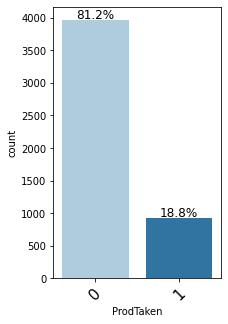

In [ ]:
labeled_barplot(df, "ProdTaken", perc=True)

**Age**

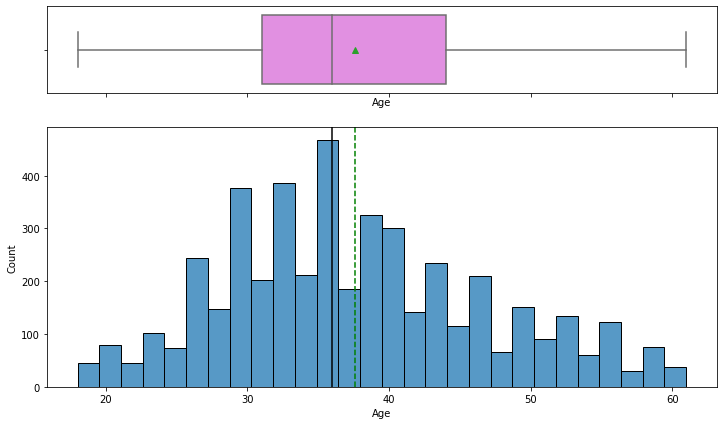

In [ ]:
histogram_boxplot(df,"Age")

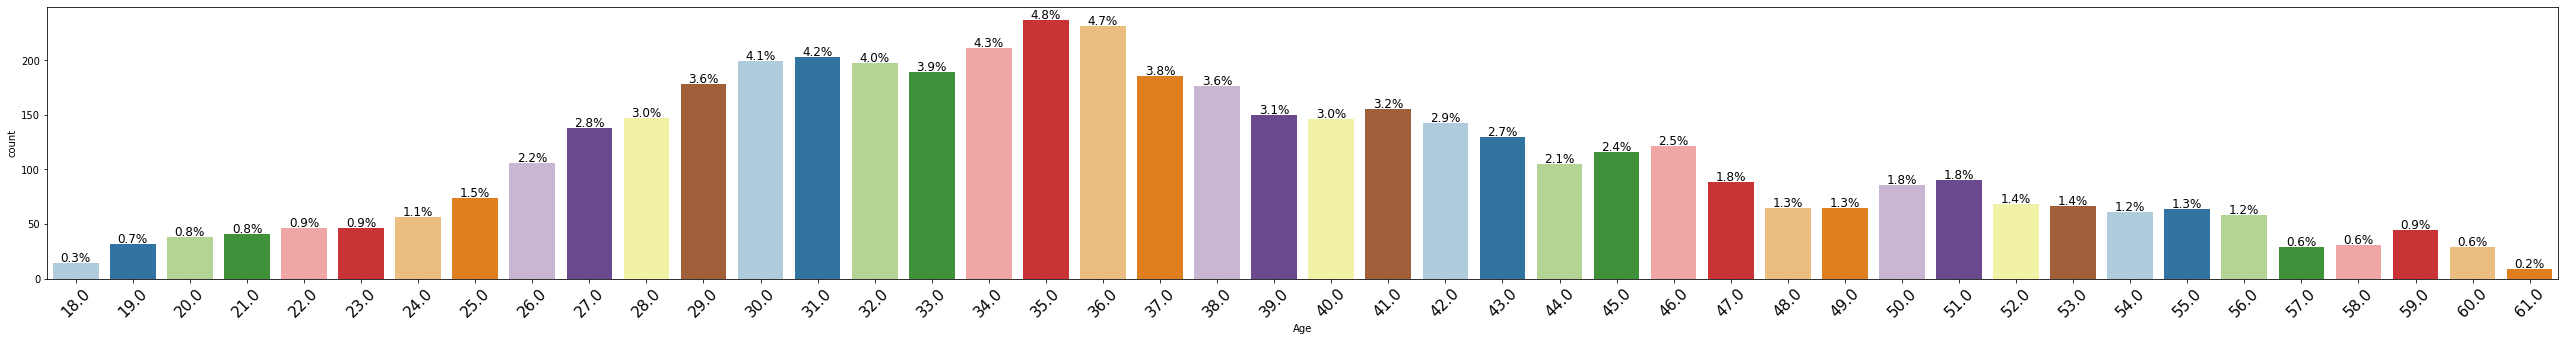

In [ ]:
labeled_barplot(df, "Age", perc=True)

**TypeOfContact**

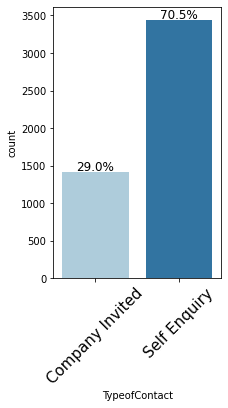

In [ ]:
labeled_barplot(df, "TypeofContact", perc=True)

**CityTier**

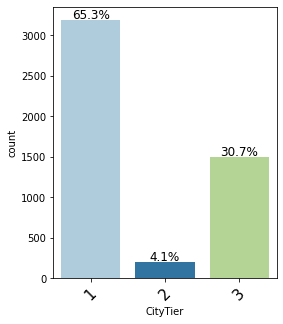

In [ ]:
labeled_barplot(df, "CityTier", perc=True)

**Occupation**

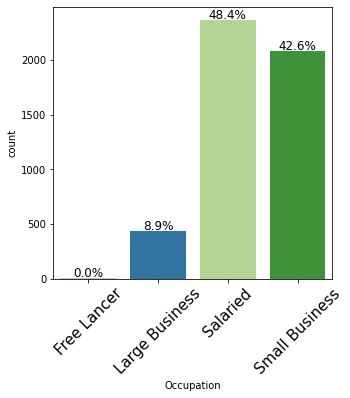

In [ ]:
labeled_barplot(df, "Occupation", perc=True)

**Gender**

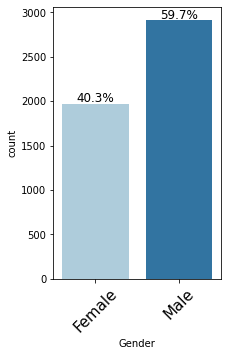

In [ ]:
labeled_barplot(df, "Gender", perc=True)

**NumberOfPersonVisiting**

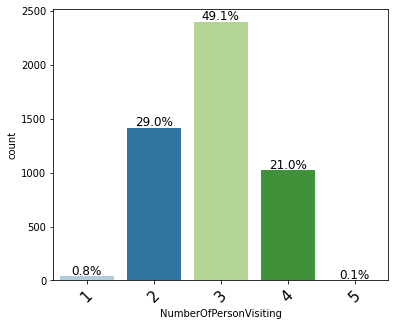

In [ ]:
labeled_barplot(df, "NumberOfPersonVisiting", perc=True)

**PreferredPropertyStar**

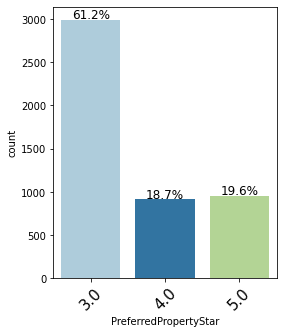

In [ ]:
labeled_barplot(df, "PreferredPropertyStar", perc=True)

**MaritalStatus**

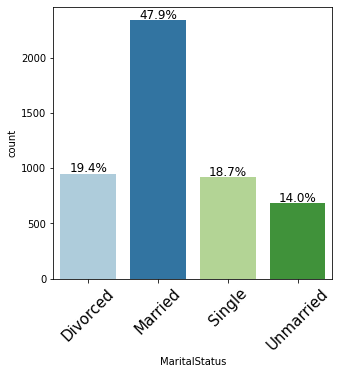

In [ ]:
labeled_barplot(df, "MaritalStatus", perc=True)

**NumberOfTrips**

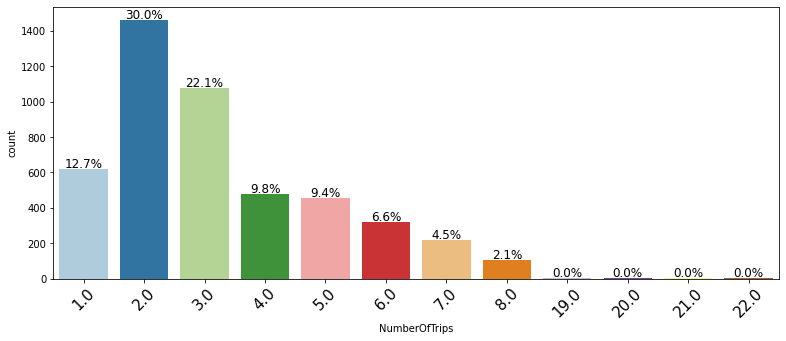

In [ ]:
labeled_barplot(df, "NumberOfTrips", perc=True)

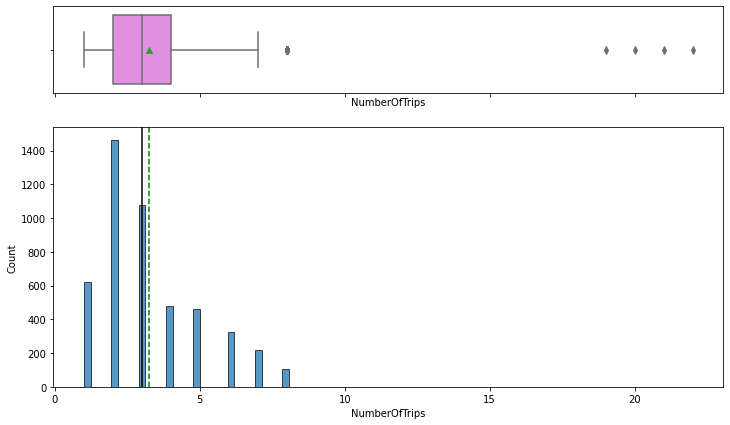

In [ ]:
histogram_boxplot(df,"NumberOfTrips")

**Passport**

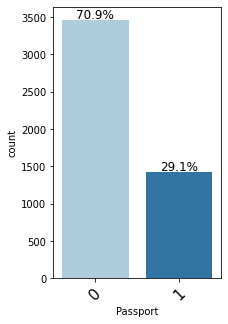

In [ ]:
labeled_barplot(df, "Passport", perc=True)

**OwnCar**

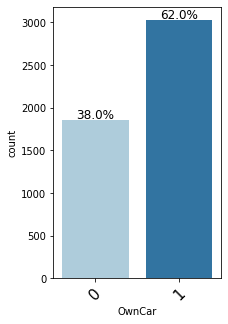

In [ ]:
labeled_barplot(df, "OwnCar", perc=True)

**NumberOfChildrenVisisting**

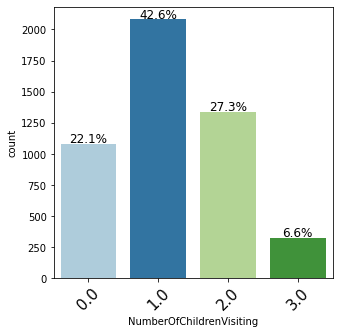

In [ ]:
labeled_barplot(df, "NumberOfChildrenVisiting", perc=True)

**Designation**

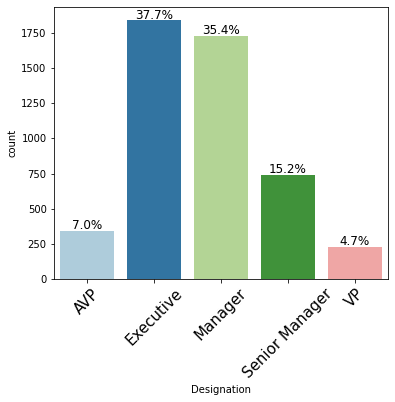

In [ ]:
labeled_barplot(df, "Designation", perc=True)

**MonthlyIncome**

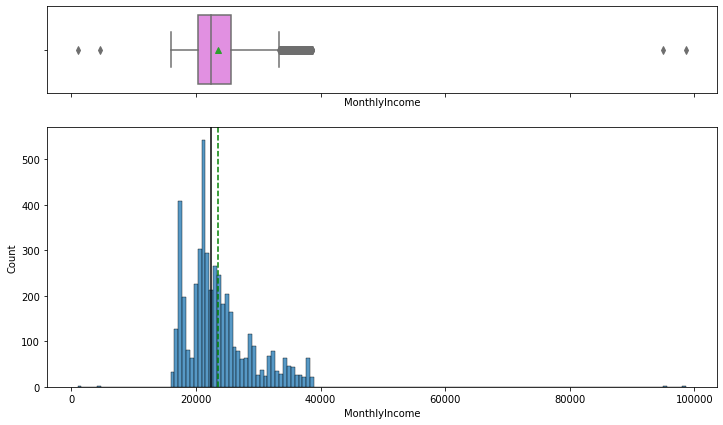

In [ ]:
histogram_boxplot(df,"MonthlyIncome")

In [ ]:
df['MonthlyIncome'].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
Q1 = df["MonthlyIncome"].quantile(0.25)  # 25th quantile
Q3 = df["MonthlyIncome"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker_income = Q1 - 1.5 * IQR
Upper_Whisker_income = Q3 + 1.5 * IQR

print(Upper_Whisker_income)

33408.5


In [ ]:
df_monthincome = df[df['MonthlyIncome']>= Upper_Whisker_income]

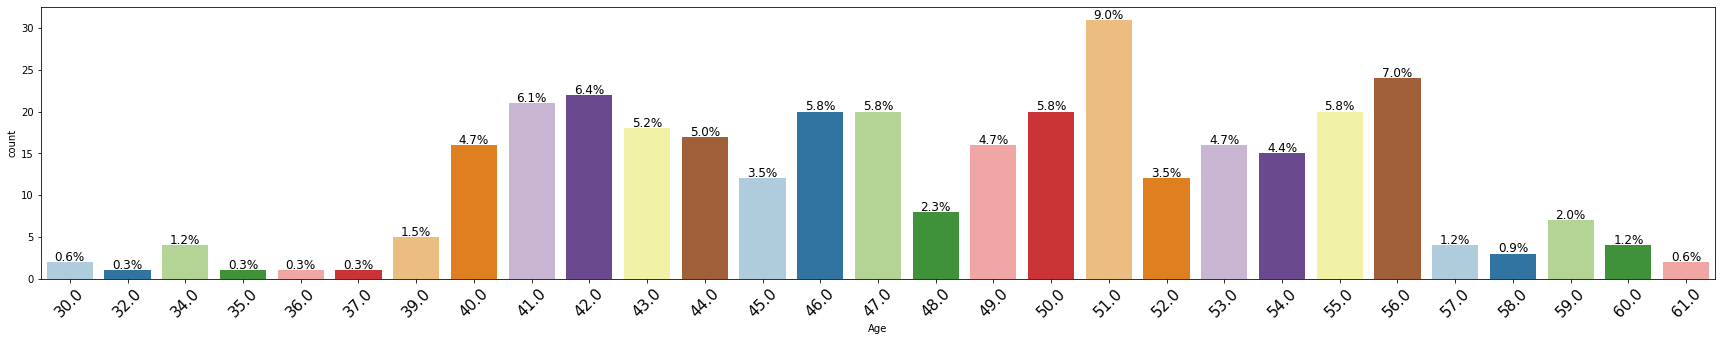

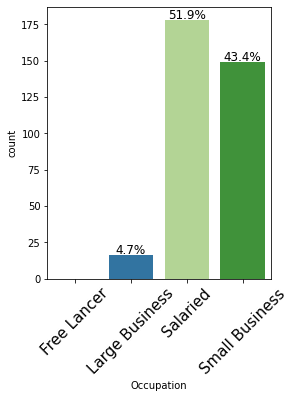

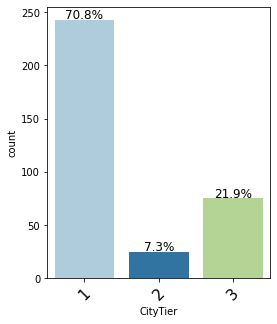

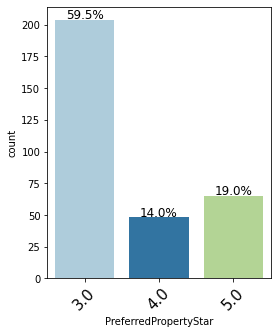

In [ ]:
labeled_barplot(df_monthincome, "Age", perc=True)
labeled_barplot(df_monthincome, "Occupation", perc=True)
labeled_barplot(df_monthincome, "CityTier", perc=True)
labeled_barplot(df_monthincome, "PreferredPropertyStar", perc=True)

In [ ]:
df_monthincome['Incomebin'] = pd.cut(df_monthincome['MonthlyIncome'], bins = [0,35000,40000,45000,50000,100000], labels = ['<35000','<40000','<45000','<50000','<100000'])

In [ ]:
df_monthincome.Incomebin.value_counts()

<40000     206
<35000     135
<100000      2
<45000       0
<50000       0
Name: Incomebin, dtype: int64

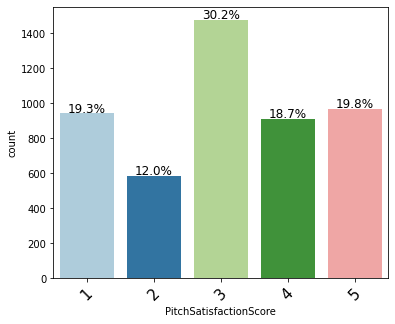

In [ ]:
labeled_barplot(df, "PitchSatisfactionScore", perc=True)

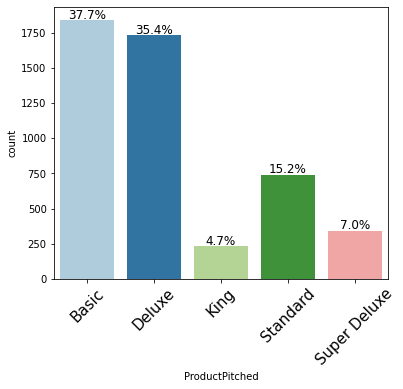

In [ ]:
labeled_barplot(df, "ProductPitched", perc=True)

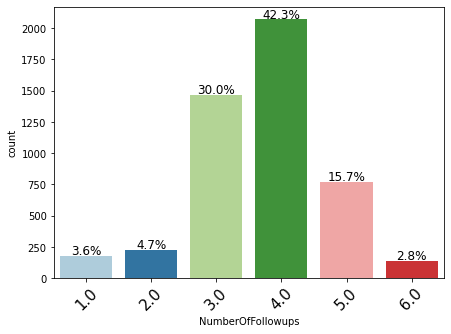

In [ ]:
labeled_barplot(df, "NumberOfFollowups", perc=True)

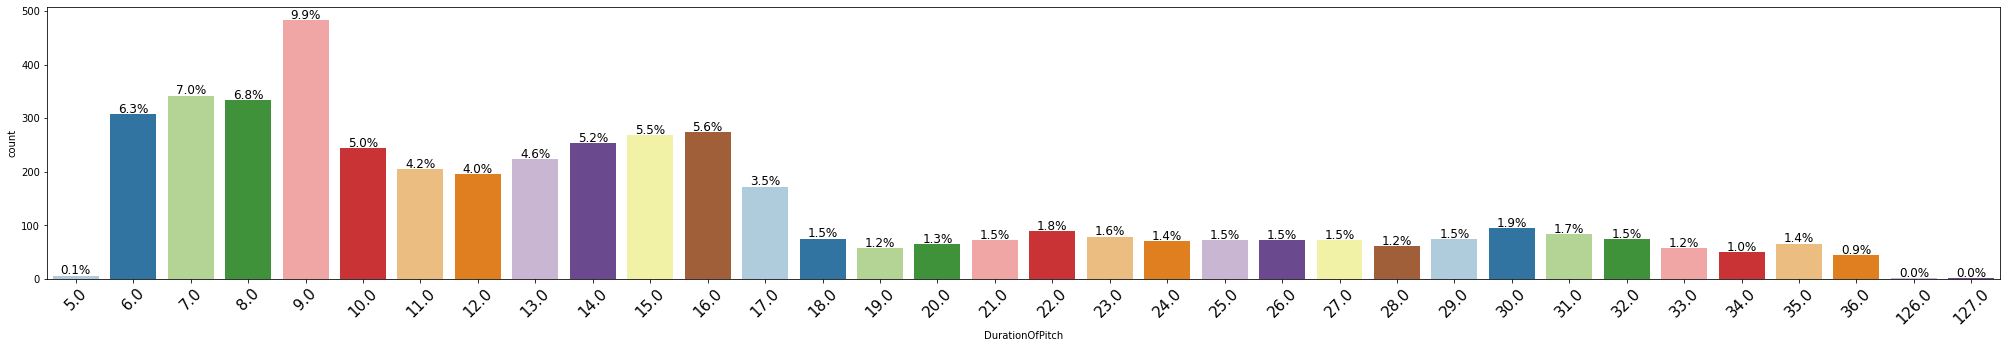

In [ ]:
labeled_barplot(df, "DurationOfPitch", perc=True)

**Age vs ProdTaken**

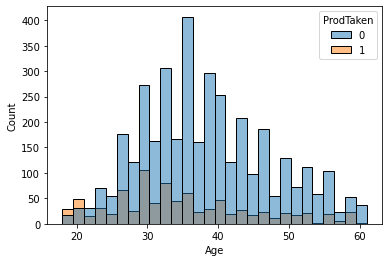

In [ ]:
sns.histplot(data=df,x="Age",hue="ProdTaken");

Most people around the age 30 have purchased the Package.

**TypeofContact vs ProdTaken**

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


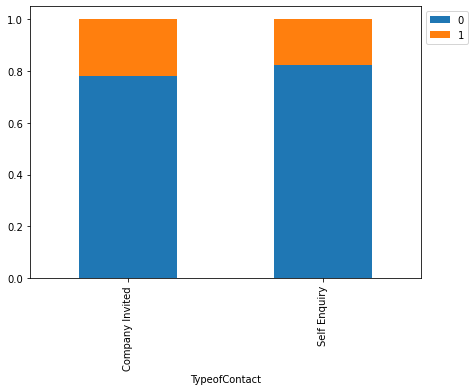

In [ ]:
stacked_barplot(df, "TypeofContact" ,"ProdTaken")

* More people who Self inquired have purchased the package.
* But, if ratio is to be taken more or less both the types have same conversion /- Self inquiry - 607/3444 = ~17.62% of Self inquiry have purchased the package. Company Invited - 310/1419 = ~21.87% of Company Invited have purchased the package.  

**CityTier vs ProdTaken**

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


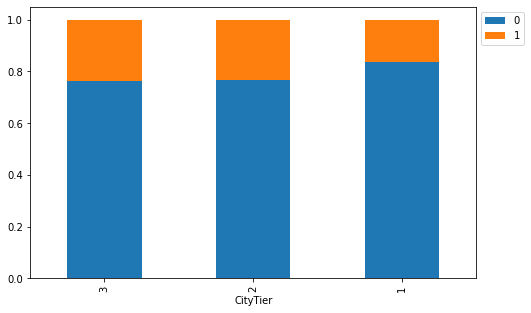

In [ ]:
stacked_barplot(df, "CityTier" ,"ProdTaken")

* Tier 1 - 520 out of 3190 people have purchased - roughly 16.30% conversion.
* Tier 2 - 46 out of 128 people have purchased - roughly 23.23% conversion.
* Tier 3 - 354 out of 1500 people have purchased - roughly 23.6% conversion.
* Tier 3 people have most purchase.

**Occupation vs ProdTaken**

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


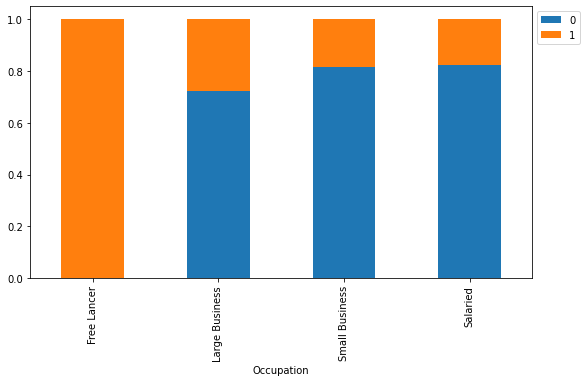

In [ ]:
stacked_barplot(df, "Occupation" ,"ProdTaken")

* Freelancer - one key feature to be noted is that there are only 2 people whose occupation is Freelancer and both have purchased the package. We also saw from monthly income that only 2 people had monthly income beyond 50000. Let us check if the occupation of those outliers is Freelancer.
* Large Business - 120 out of 434 people have purchased the package - roughly 27.65% conversion.
*  Small Business - 384 put of 2084 people have purchased the package - roughly 18.43% conversion.
* Salaried - 414 out of 2368 people have purchased the package - roughly 17.48% conversion.
* People whose occupation is Large Business have mostly purchased the package.  

In [ ]:
df[df['Occupation'] == 'Free Lancer']

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
2446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0


In [ ]:
df[df['MonthlyIncome'] >=50000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


**Gender vs ProdTaken**

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


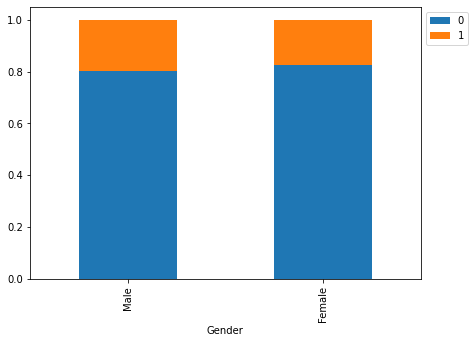

In [ ]:
stacked_barplot(df, "Gender" ,"ProdTaken")

* More Male have purchased the package - 578 out of 2916 - roughly 19.82% conversion.
* Female - 342 out of 1972 have purchased the package - 17.34% conversion.

**NumberOfPersonVisiting vs ProdTaken**

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


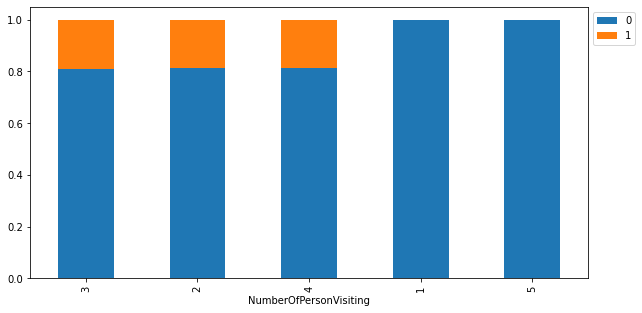

In [ ]:
stacked_barplot(df, "NumberOfPersonVisiting" ,"ProdTaken")

* One interesting feature is that from the dataset when the Number of people visitng along with the customer is 1 and 5 - those customers have not purchased the package.
* NumberOfPersonVisiting = 2 -> 267 out of 1418 have purchased the package - roughly 18.83% conversion
* NumberOfPersonVisiting = 3 -> 460 out of 2402 have purchased the package - roughly 19.15% conversion
* NumberOfPersonVisiting = 4 -> 193 out of 1026 have purchased the package - roughly 18.81% conversion.  


**PreferredPropertyStar vs ProdTaken**

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


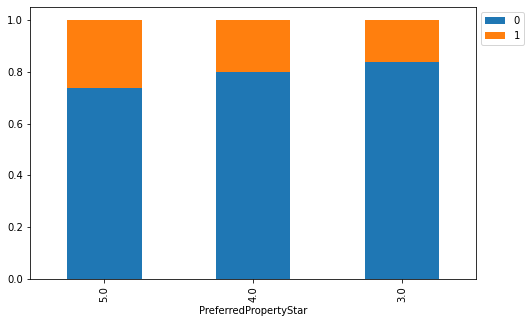

In [ ]:
stacked_barplot(df, "PreferredPropertyStar" ,"ProdTaken")

* More people who preferred 3 stars have purchased the package - 482 out of 2993 have purchased the package - roughly 16.10% conversion.
* Preferrred Property Stars = 4 --> 180 out of 913 have purchased the plan - roughly 19.72% conversion.
* Preferred Property Stars = 5 --> 250 out of 956 have purchased the plan - roughly 27.29%
* Although most people who preferred 3 stars have purchased the plan by number, if we take the percentage conversion into account, people who preferred 5 stars have predominantly purchased the package.

**MaritalStatus vs ProdTaken**

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


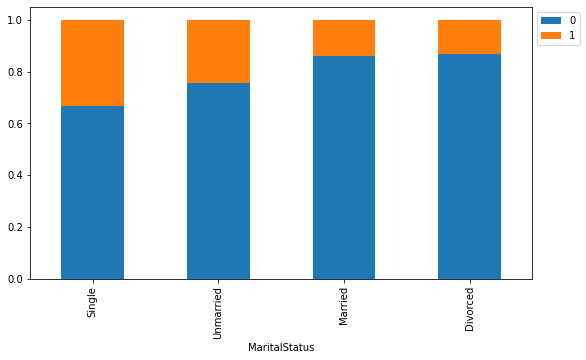

In [ ]:
stacked_barplot(df, "MaritalStatus" ,"ProdTaken")

* Single - 304 out of 916 have purchased the package - roughly 33.19% conversion
* Married - 326 out of 2340 have purchased the package - roughly 13.93% conversion
* Unmarried - 166 out of 682 have purchased the package - roughly 24.34% conversion
* Divorced - 124 out of 950 have purchased the package - roughly 13.05% conversion
* Mostly Single people have purchased the package.

**NumberOfTrips vs ProdTaken**

ProdTaken         0    1   All
NumberOfTrips                 
All            3840  908  4748
2.0            1165  299  1464
3.0             862  217  1079
1.0             508  112   620
6.0             258   64   322
5.0             396   62   458
7.0             156   62   218
4.0             417   61   478
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


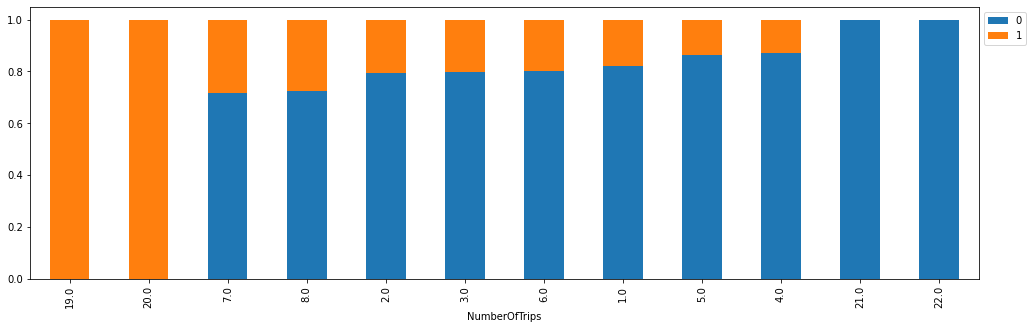

In [ ]:
stacked_barplot(df, "NumberOfTrips" ,"ProdTaken")

* 2 interesting points:
  * When Number of Trips = 19 & 20 (only 1 people in each category), both have purchased the package.
  * When Number of Trips = 21 & 22 (only 1 people in each category), both did not purchase the package.

* Let us see the complete data for these datapoints.  

In [ ]:
df[df['NumberOfTrips'] >= 10]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


* For those with Number of Trips = 19 & 20 and purchased the package, their occupation is Large Business.
* For those with Number of Trips = 21 & 22 and did not purchase the package, their occupation is Salaried.
* It is also to be noted that both the customers with Large Business have less monthly income than the other both who did not purchase the package but still purchased the package.


**Passport vs ProdTaken**

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


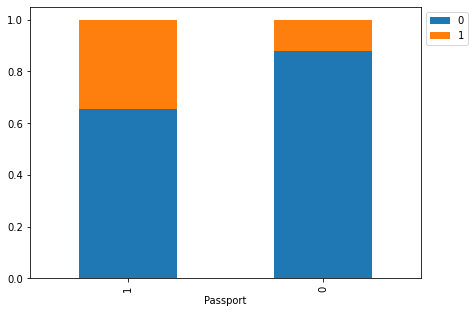

In [ ]:
stacked_barplot(df, "Passport" ,"ProdTaken")

* People who had passport have purchased the package for most part.

**OwnCar vs ProdTaken**

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


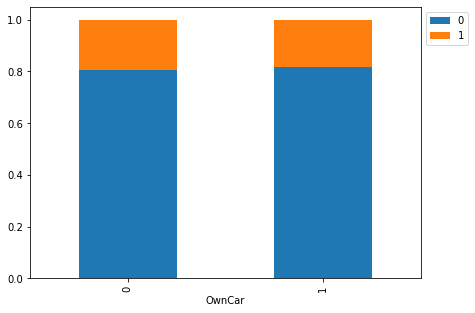

In [ ]:
stacked_barplot(df, "OwnCar" ,"ProdTaken")

* If we take just the number, people who owns a car have purchased the package. But, if we were to take percentage, both the categories have similar percent.

**NumberOfChildrenVisiting vs ProdTaken**

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


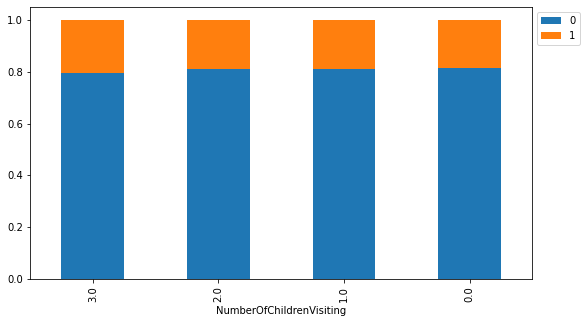

In [ ]:
stacked_barplot(df, "NumberOfChildrenVisiting" ,"ProdTaken")

* All the categories have similar percent of people who purchased a package.

**Designation vs ProdTaken**

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


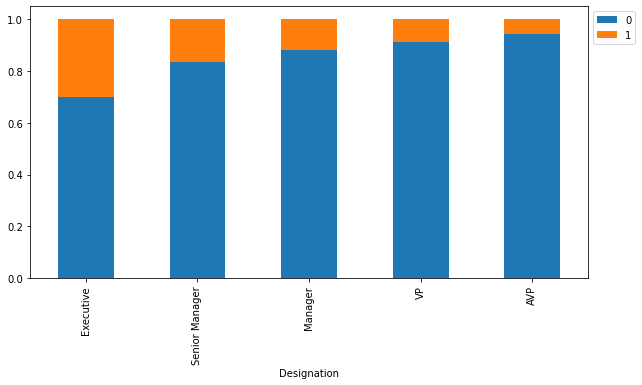

In [ ]:
stacked_barplot(df, "Designation" ,"ProdTaken")

* Excutive has the hightest number of purchases. 552 out of 1842 - 29.97% conversion.
* Manager - 204 out of 1732 have purchased a package - 11.78% conversion
* Senior Manager - 124 out of 742 have purchased a package - 16.71% conversion
* AVP - only 342 datapoints - out of which 20 have purchased - 5.84%
* VP - only 230 datapoints - out of which 20 have purchased - 8.69%

**MonthlyIncome vs ProdTaken**

Just for this study alone, let us remove the 2 datapoints whose monthly income is > 50000

In [ ]:
df_incomeoutlierremoved = df[df['MonthlyIncome'] <50000]

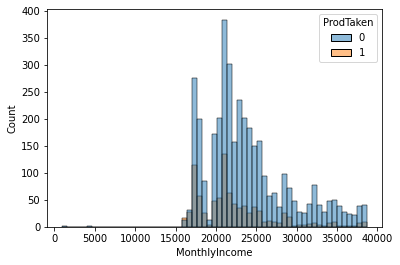

In [ ]:
sns.histplot(data=df_incomeoutlierremoved,x="MonthlyIncome",hue="ProdTaken");

* From the histogram, it is quite obvious to see that most people who purchased a package have monthly income in the range of 20000 - 25000. It is also to be noted that this range also has the most nunber of people who did not purchase the package. It is safe to assume that since this dataset has more number of datapoint in this range, our results indicate such a feature.

**PitchSatisfactionScore vs ProdTaken**

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


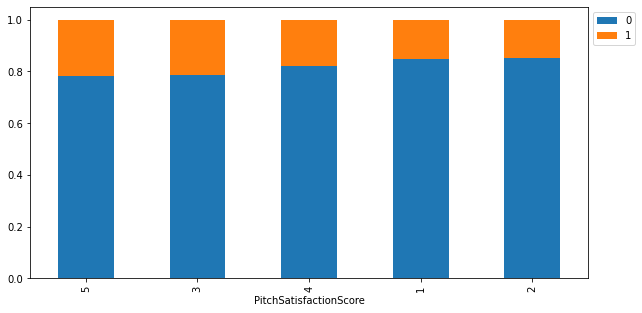

In [ ]:
stacked_barplot(df, "PitchSatisfactionScore" ,"ProdTaken")

* It is to be noted that all the scores have similar percentage of people who purchased the package.

**ProductPitched vs ProdTaken**

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


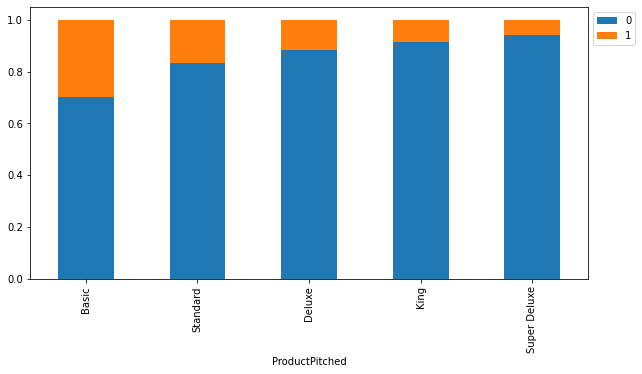

In [ ]:
stacked_barplot(df, "ProductPitched" ,"ProdTaken")

* The Basic package has been purchased by most people - 552 out of 1842 - roughly 29.85%
* Standard becomes the next highest interms of percentage - 16.71%

**NumberOfFollowups vs ProdTaken**

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


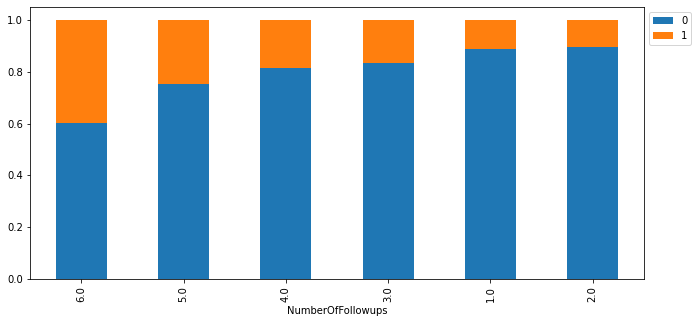

In [ ]:
stacked_barplot(df, "NumberOfFollowups" ,"ProdTaken")

* Although the number of followups = 6 has less datapoints, we could see that most of those datapoints have purchased a package.
* **From the graph above, it is very evident that with increase in number of followups, the chance of people purhcasing a package is more.**

**DurationOfPitch vs ProdTaken**

ProdTaken           0    1   All
DurationOfPitch                 
All              3762  875  4637
9.0               404   79   483
8.0               273   60   333
16.0              218   56   274
15.0              217   52   269
7.0               294   48   342
10.0              199   45   244
14.0              212   41   253
6.0               268   39   307
11.0              168   37   205
12.0              162   33   195
13.0              191   32   223
31.0               52   31    83
30.0               65   30    95
17.0              148   24   172
22.0               66   23    89
19.0               36   21    57
23.0               58   21    79
29.0               53   21    74
18.0               56   19    75
20.0               46   19    65
28.0               44   17    61
21.0               57   16    73
24.0               54   16    70
32.0               59   15    74
27.0               58   14    72
25.0               59   14    73
26.0               60   12    72
33.0      

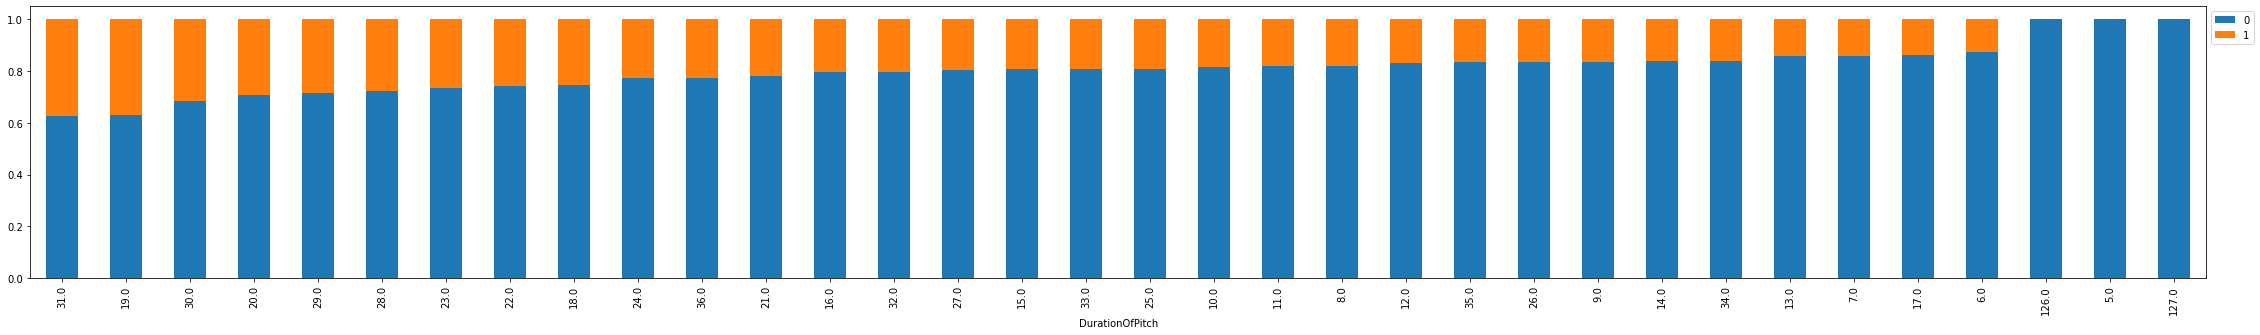

In [ ]:
stacked_barplot(df, "DurationOfPitch" ,"ProdTaken")

* It is very evident from the graph that when the duration of Pitch is the least ( =6) and whent the duration is pitch is very high (in the range of 120s), the customers have not purchased a package.

Let us remove these points to study further.

In [ ]:
df_durationofpitchedited = df[(df['DurationOfPitch'] > 5 )]
df_durationofpitchedited = df[df['DurationOfPitch'] < 35]

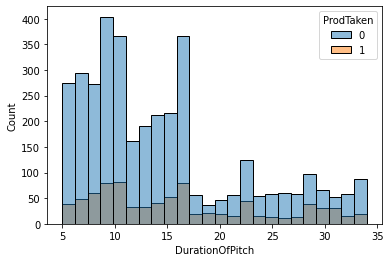

In [ ]:
sns.histplot(data=df_durationofpitchedited,x="DurationOfPitch",hue="ProdTaken");

* More people have purchased a package when the duration of pitch is around 10 mins

Let us see the customer database for each of the packages purchased.

**Basic Package**

In [ ]:
df_purchased = df[df['ProdTaken'] == 1]
df_basic = df_purchased[df_purchased['ProductPitched'] == 'Basic']

In [ ]:
df_basic.shape

(552, 19)

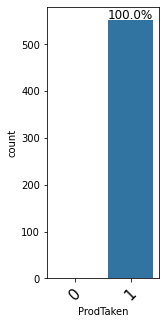

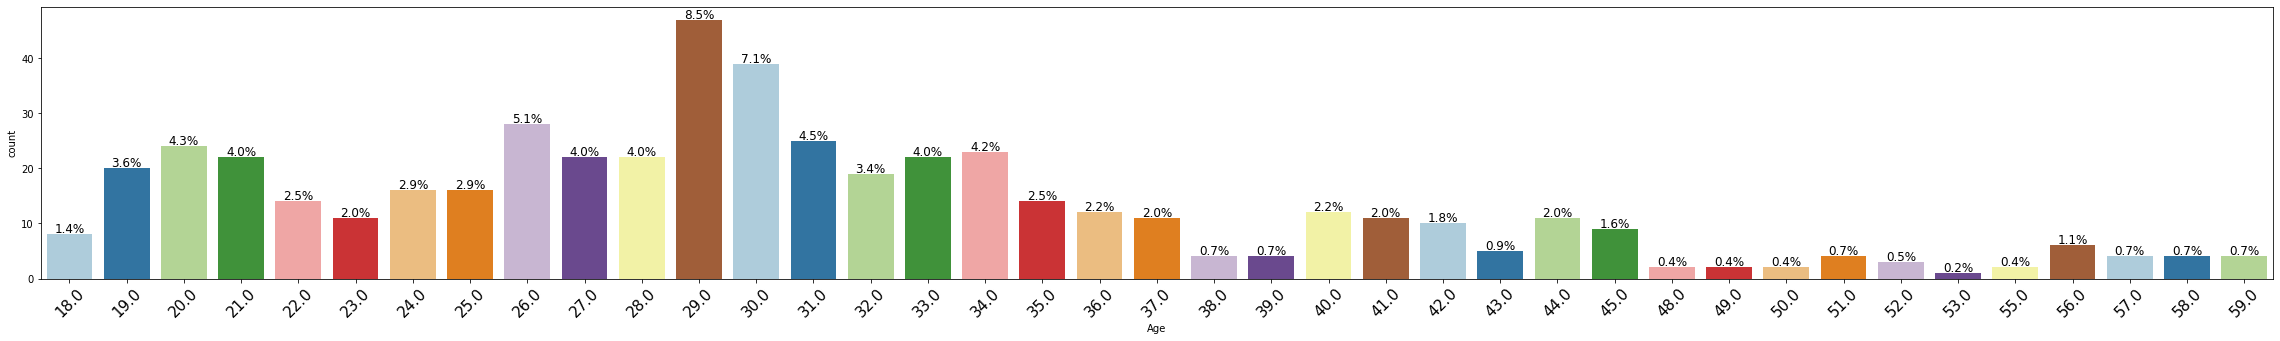

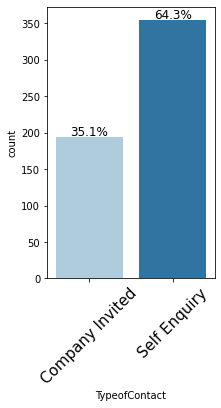

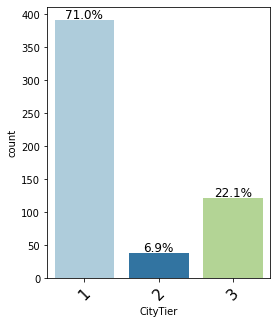

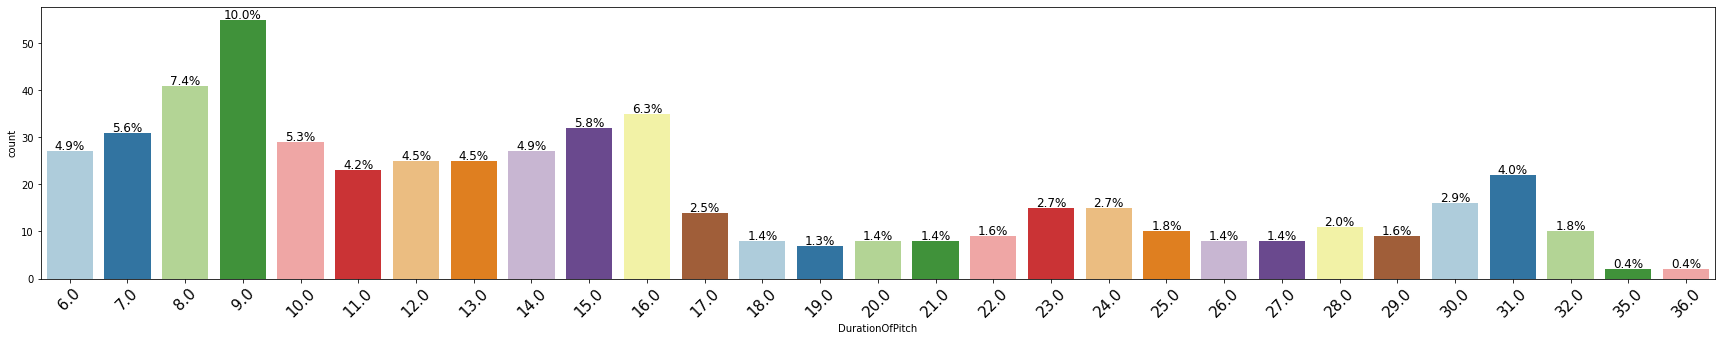

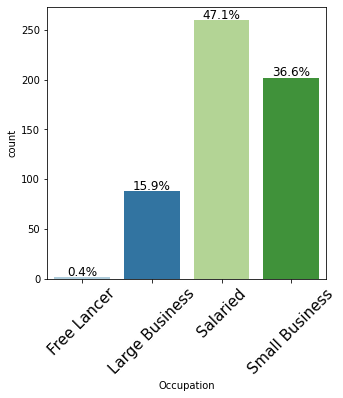

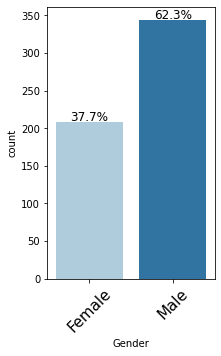

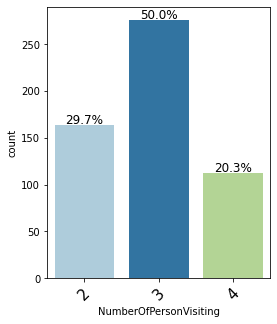

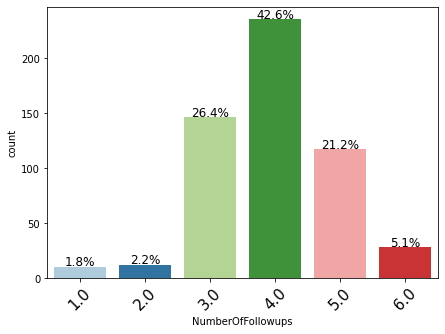

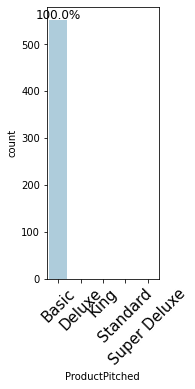

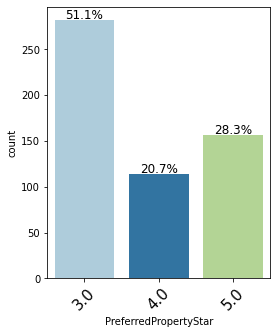

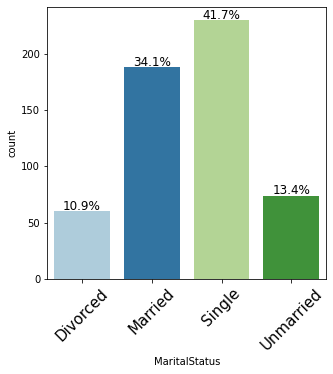

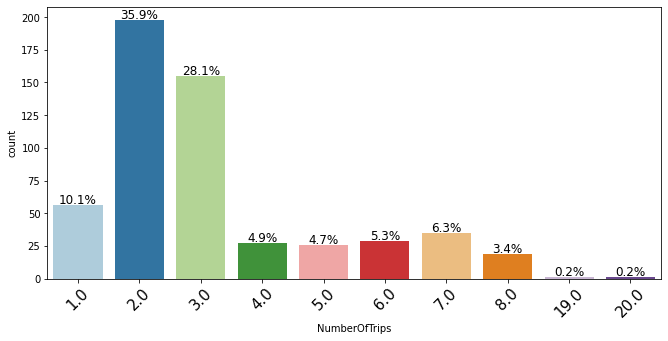

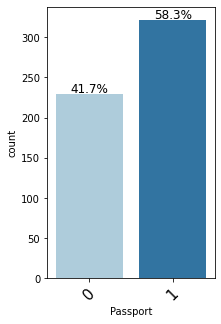

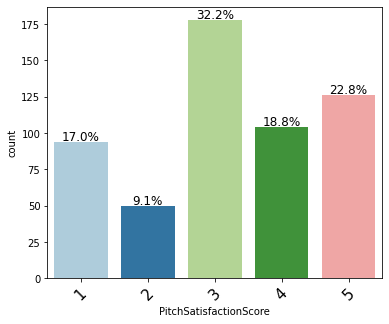

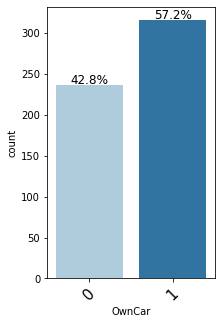

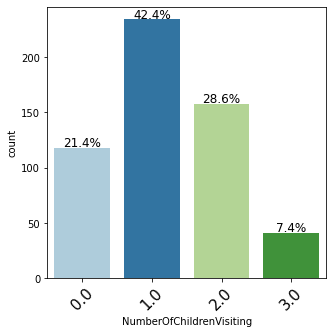

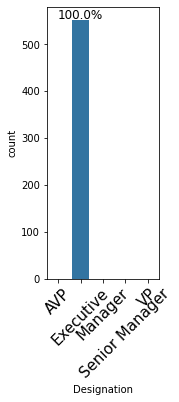

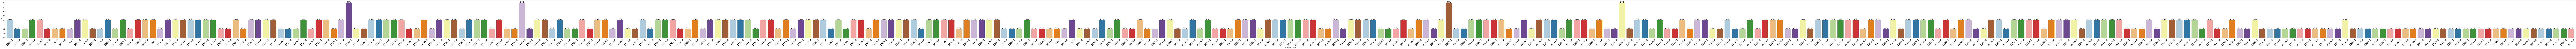

In [ ]:
for i in columns:
  labeled_barplot(df_basic, i, perc=True)
  plt.show()

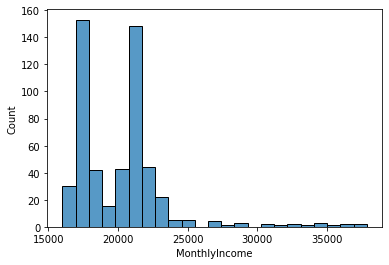

In [ ]:
sns.histplot(df_basic, x="MonthlyIncome");

**Basic Package Highlights**

Most of the customers who have selected the Basic Package are aged between 25 to 20, mostly self inquired, mostly live in Tier 1 city. Although the duration of pitch is widely spread, majority is between 8 to 16 mins, mostly have small business as occupation, most of these customers are Male. In most cases, the number of persons visiting with the customer is 3, the number of followups with these customer is mostly 4, about 50% of these customers prefer 3 star hotel, majority of these customers are single. The number of trips is spread across, but mostly these customers take 2 to 3 trips in a year, most of these customers have passport, and owns car. All of these customers are Executive. Majority of these customers have salary below 25000.

**Deluxe Package**

In [ ]:
df_purchased = df[df['ProdTaken'] == 1]
df_deluxe = df_purchased[df_purchased['ProductPitched'] == 'Deluxe']

In [ ]:
df_deluxe.shape

(204, 19)

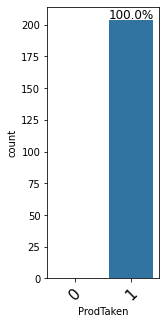

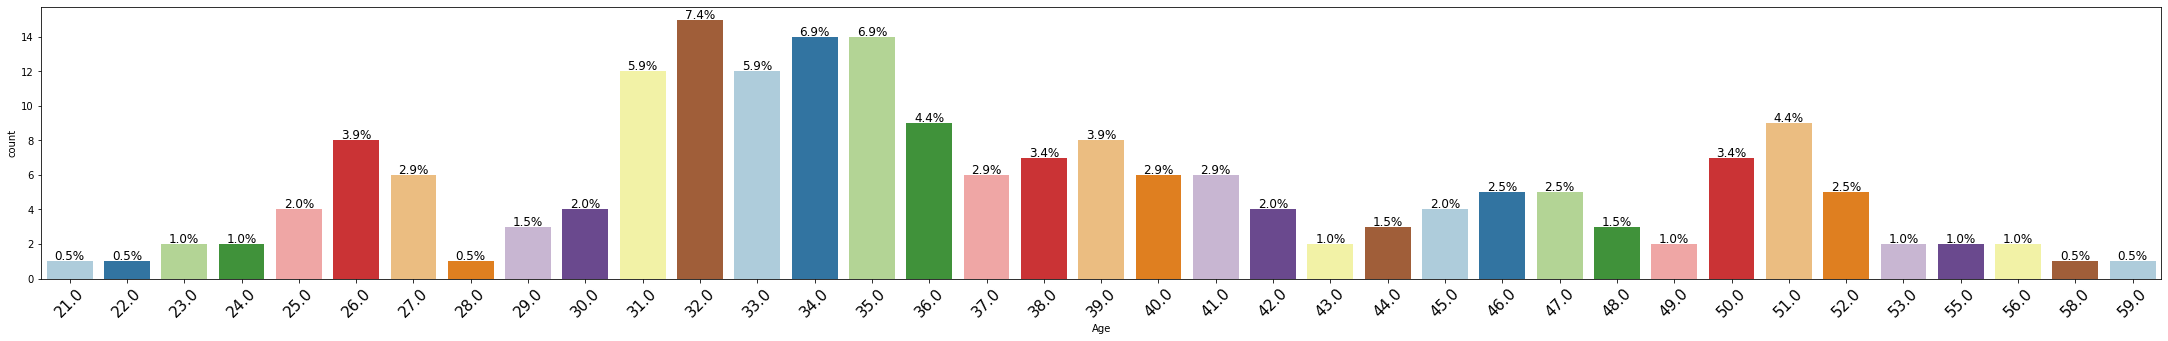

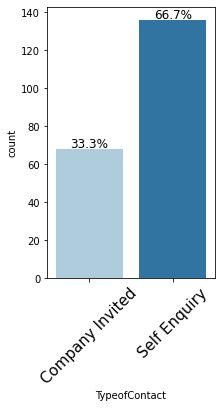

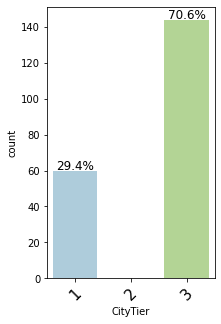

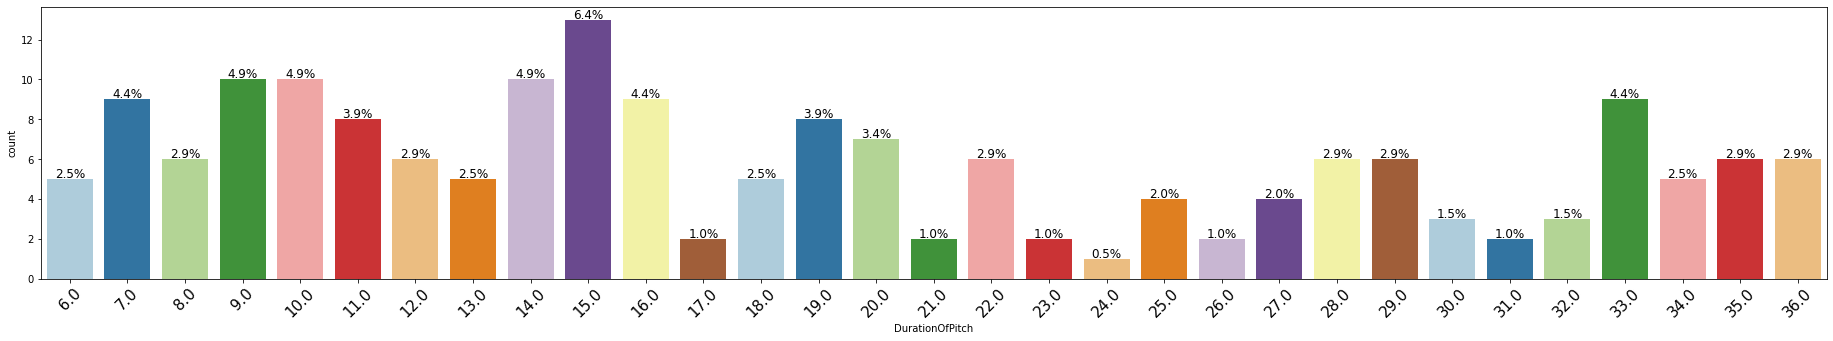

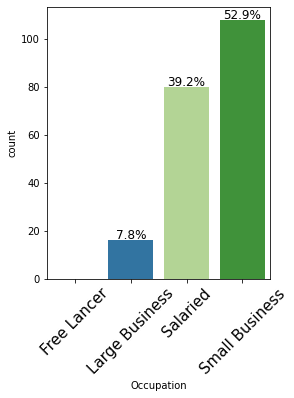

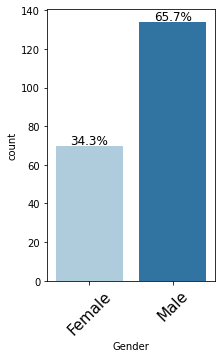

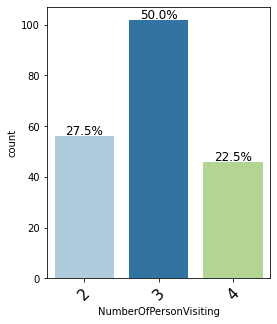

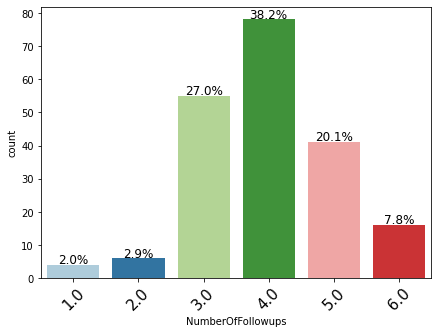

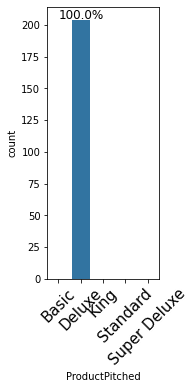

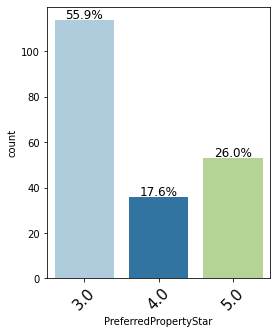

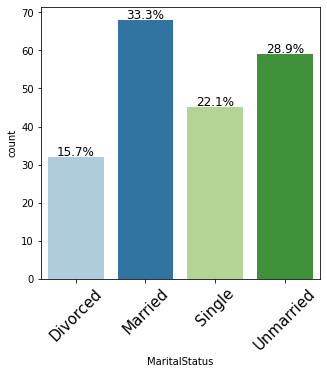

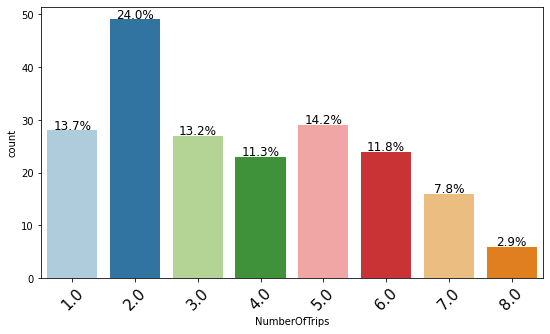

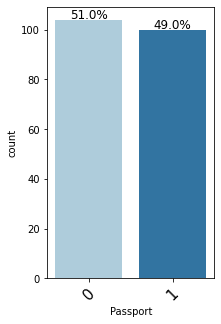

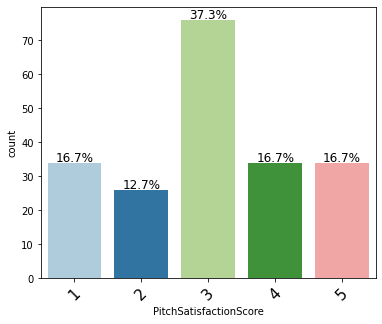

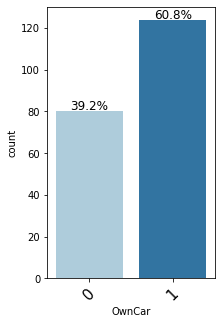

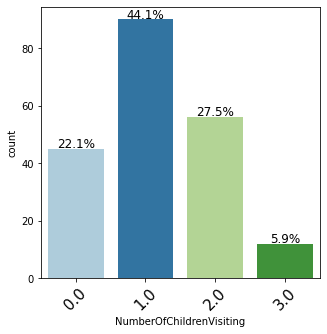

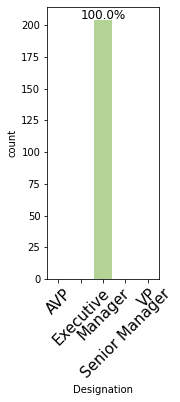

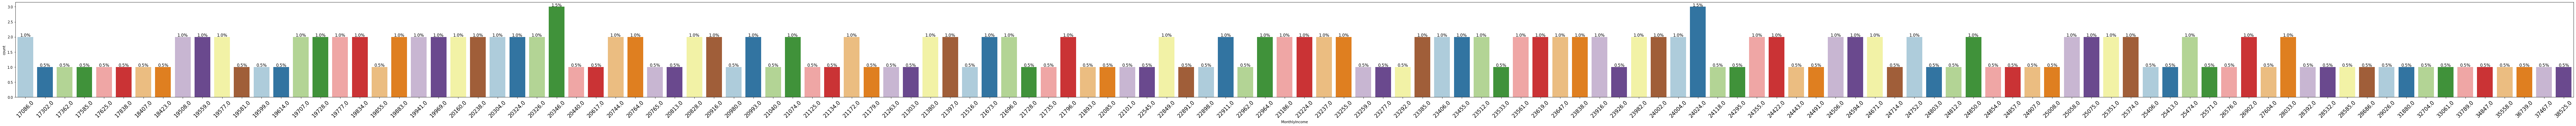

In [ ]:
for i in columns:
  labeled_barplot(df_deluxe, i, perc=True)
  plt.show()

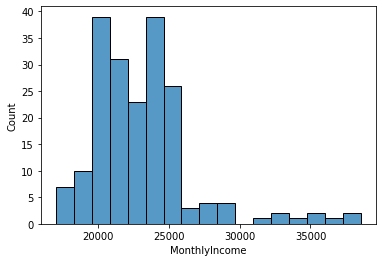

In [ ]:
sns.histplot(df_deluxe, x="MonthlyIncome");

**Deluxe Package Highlights**

Most of the customers who have selected the Basic Package are aged between 31 to 39, mostly self inquired, mostly live in Tier 3 city. Although the duration of pitch is widely spread, majority is between 6 to 20 mins, mostly have small business as occupation, most of these customers are Male. In most cases, the number of persons visiting with the customer is 3, the number of followups with these customer is mostly 4, about 50% of these customers prefer 3 star hotel, majority of these customers are Married but Unmarried also prefer this package. The number of trips is spread across, but mostly these customers take 2 trips in a year. Both types of customers with passport and without passport prefer this package and mostly owns car. Surprisingly, all of these customers are Managers. Majority of these customers have salary between 20000 to 25000.

**King Package**

In [ ]:
df_purchased = df[df['ProdTaken'] == 1]
df_king = df_purchased[df_purchased['ProductPitched'] == 'King']

In [ ]:
df_king.shape

(20, 19)

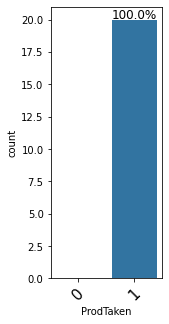

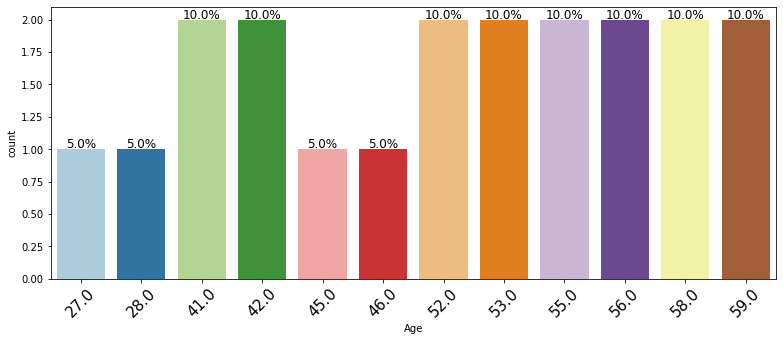

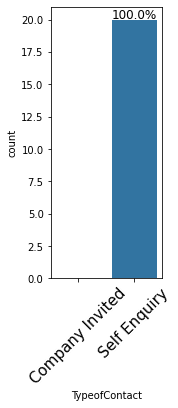

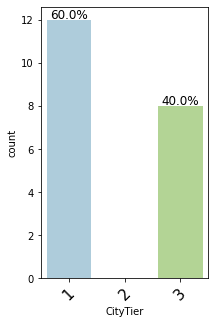

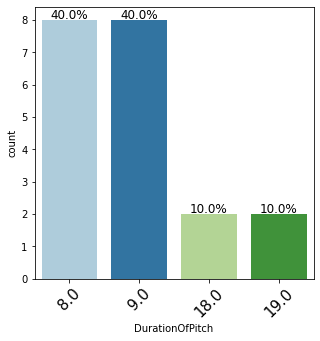

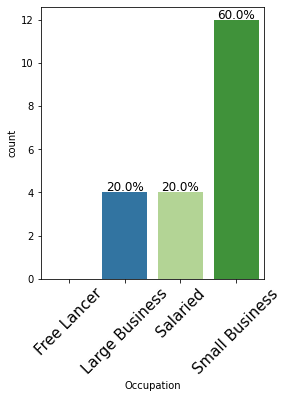

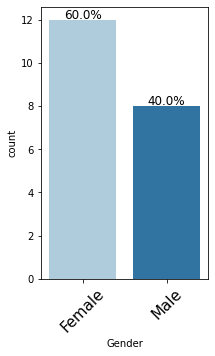

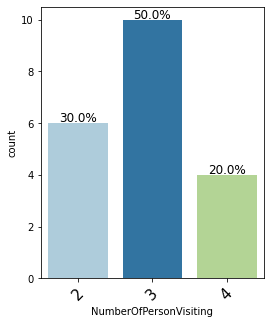

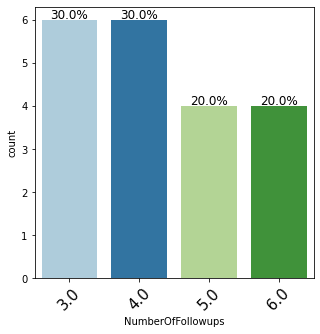

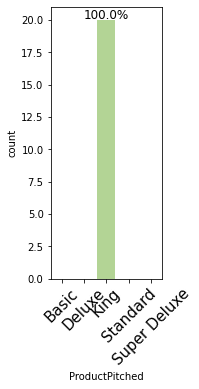

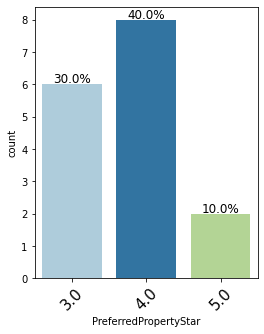

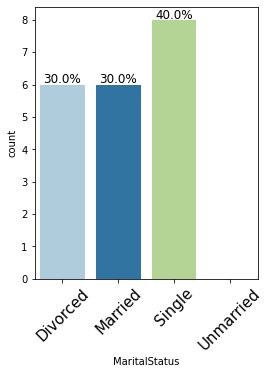

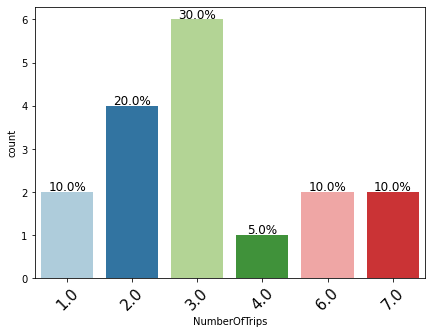

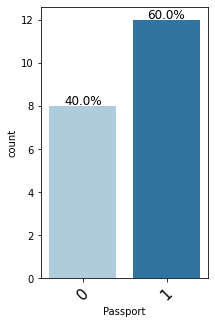

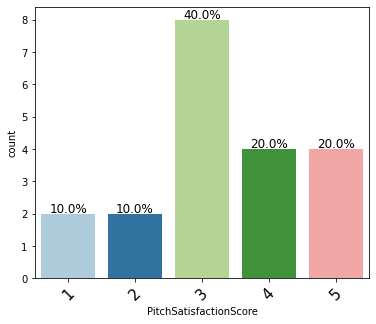

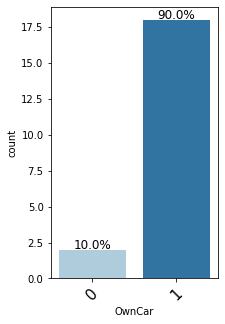

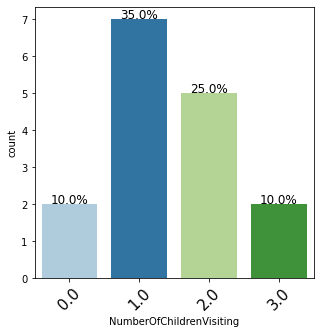

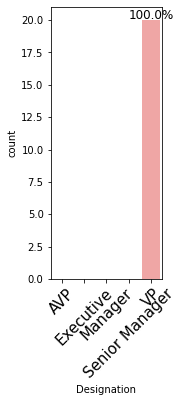

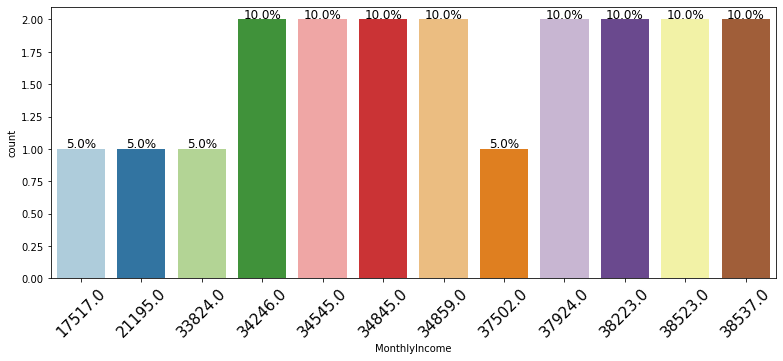

In [ ]:
for i in columns:
  labeled_barplot(df_king, i, perc=True)
  plt.show()

**King Package Highlights**

Only 20 customers have purchased this package. Most of these customers are aged between 41 and 59. All of these customers have self inquired. Majority Small business, mostly of these customers are Female. This Package is selected by Single, Married, and Divorced but not unmarried. Most of these customers own car and are VPs. The monthly income of these customers are majorly between 34000 and 39000.

**SuperDeluxe Package**

In [ ]:
df_purchased = df[df['ProdTaken'] == 1]
df_superdeluxe = df_purchased[df_purchased['ProductPitched'] == 'Super Deluxe']

In [ ]:
df_superdeluxe.shape

(20, 19)

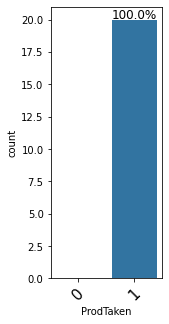

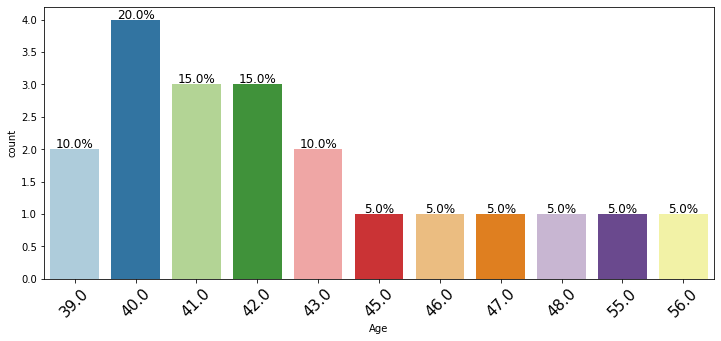

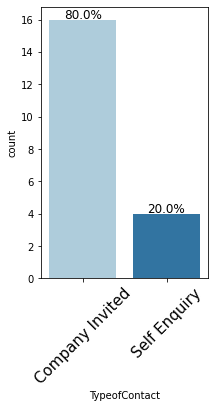

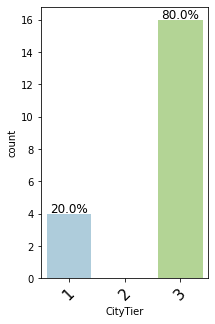

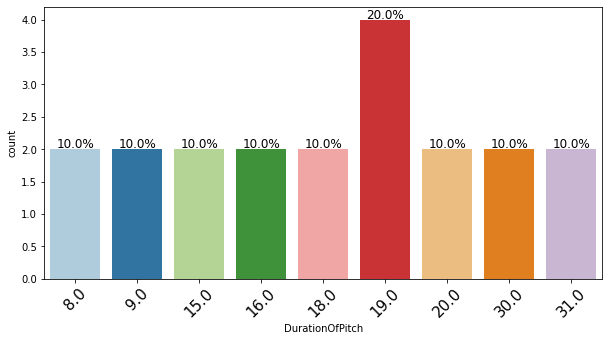

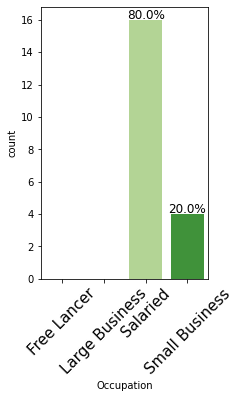

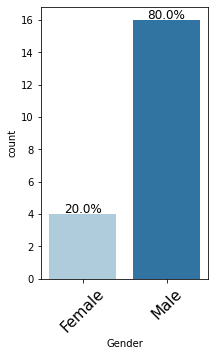

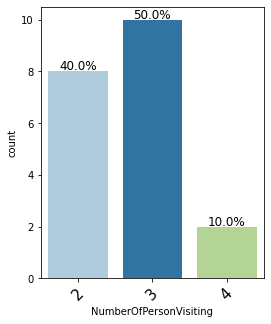

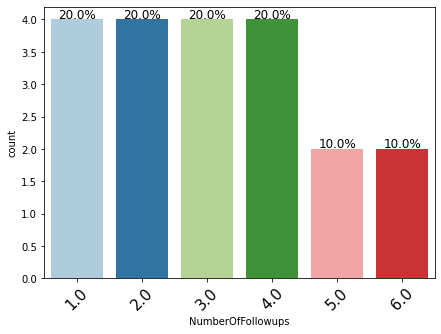

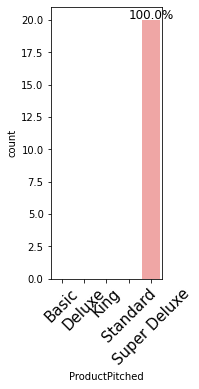

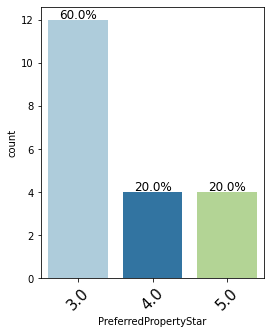

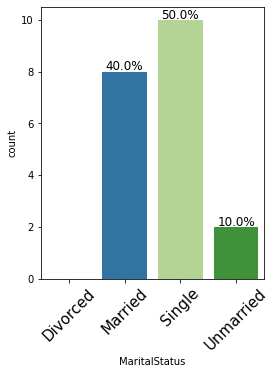

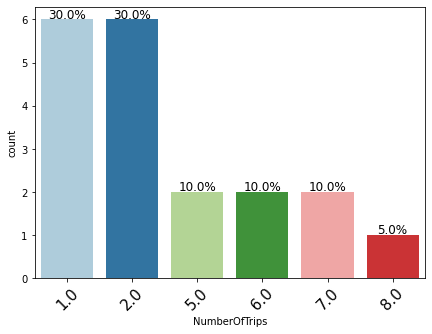

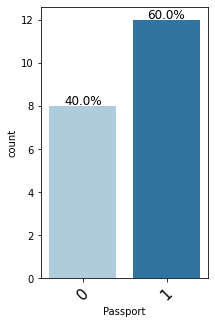

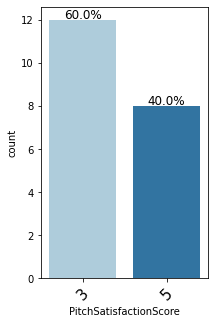

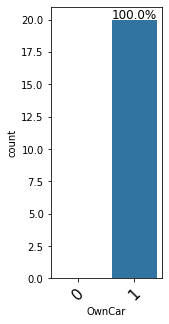

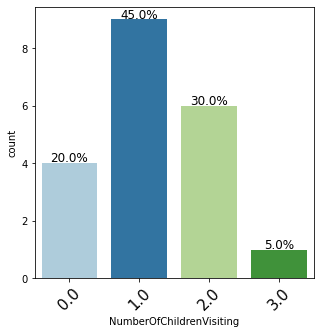

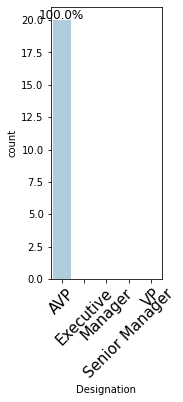

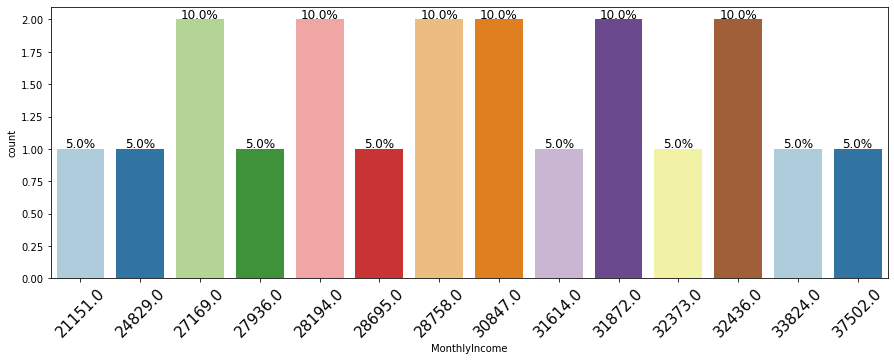

In [ ]:
for i in columns:
  labeled_barplot(df_superdeluxe, i, perc=True)
  plt.show()

**Super Deluxe Package Highlights**

There are only 20 customers who have purchased this package. Majority of these customers are aged between 39 and 43, most of these customers are company invited. Most of these customers live in Tier 3 cities. Most of these customers are Salaried and Male. This Package is not preferred by Divorced people. This package is fairly common among people who has passport and those who doesnot have a passport. All of these customers are AVPs and own a car. The monthly income of these customers range between 21000 to 37500.

**Standard Package**

In [ ]:
df_purchased = df[df['ProdTaken'] == 1]
df_standard = df_purchased[df_purchased['ProductPitched'] == 'Standard']

In [ ]:
df_standard.shape

(124, 19)

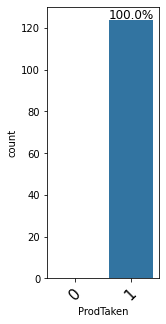

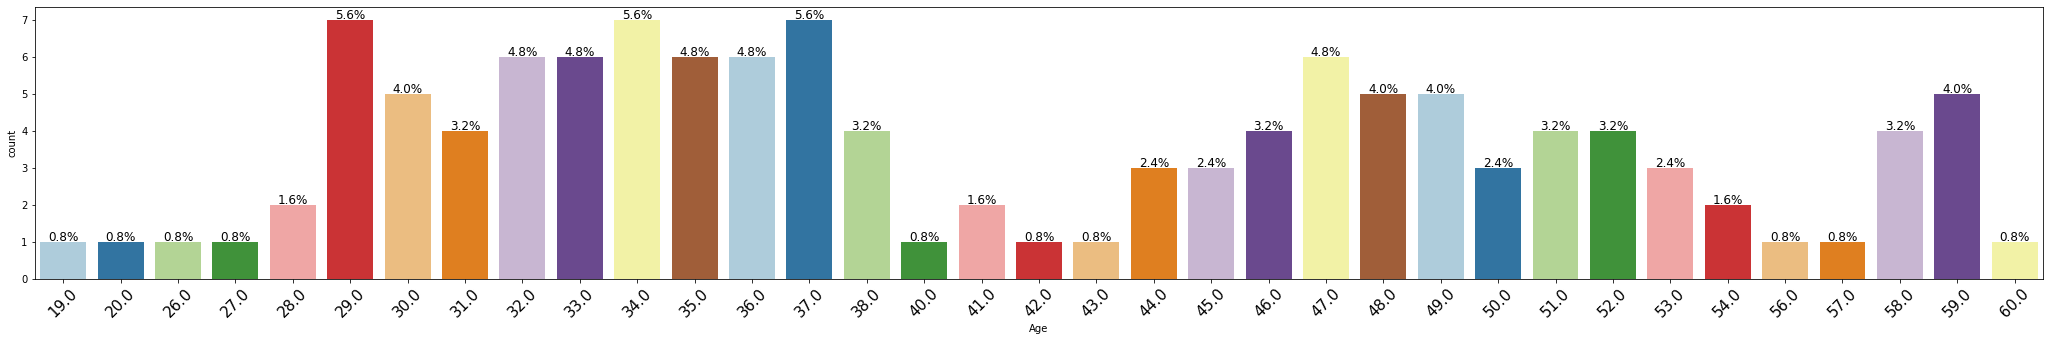

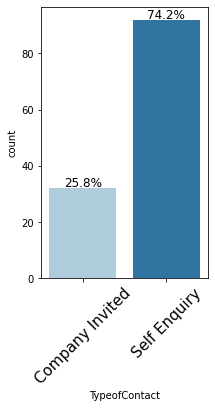

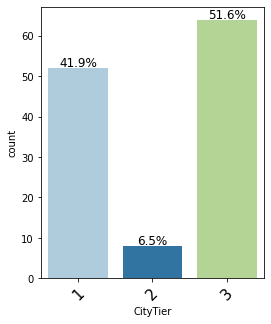

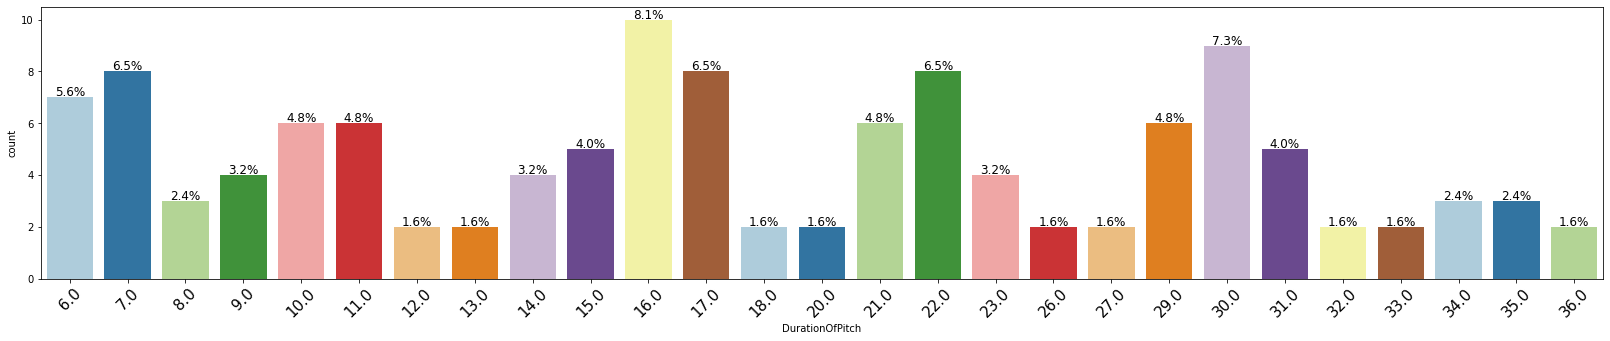

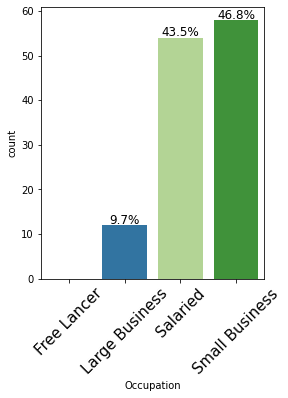

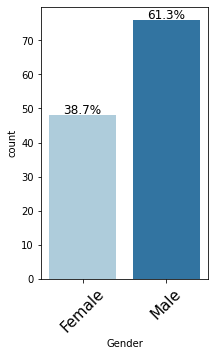

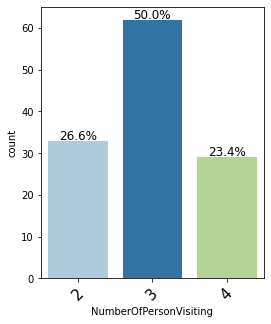

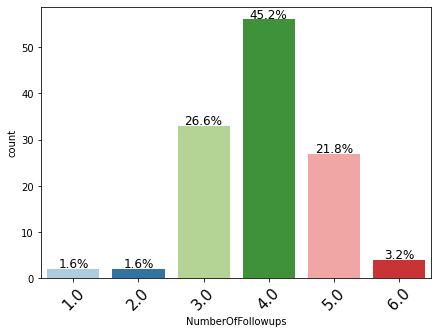

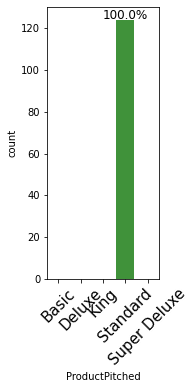

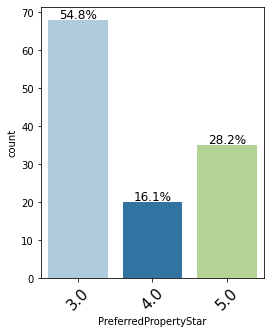

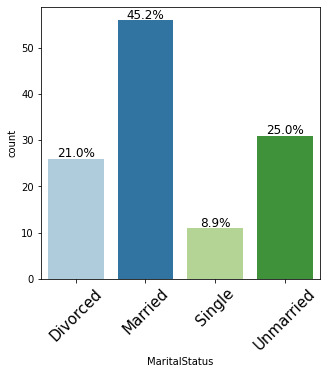

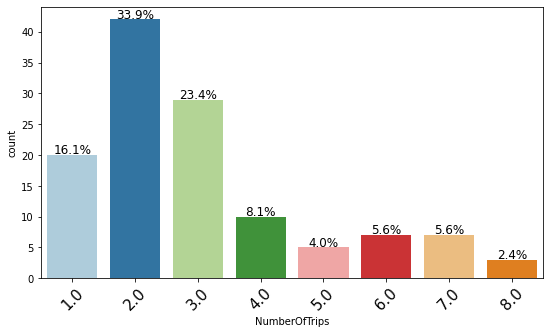

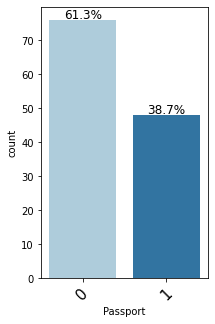

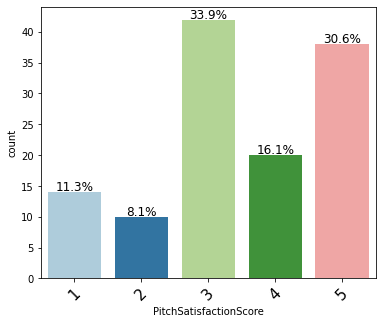

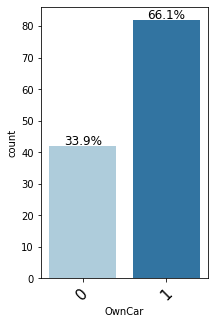

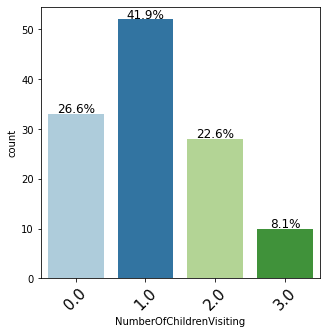

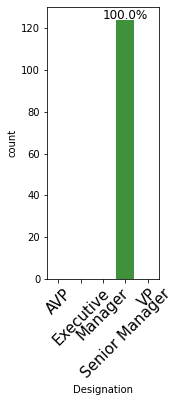

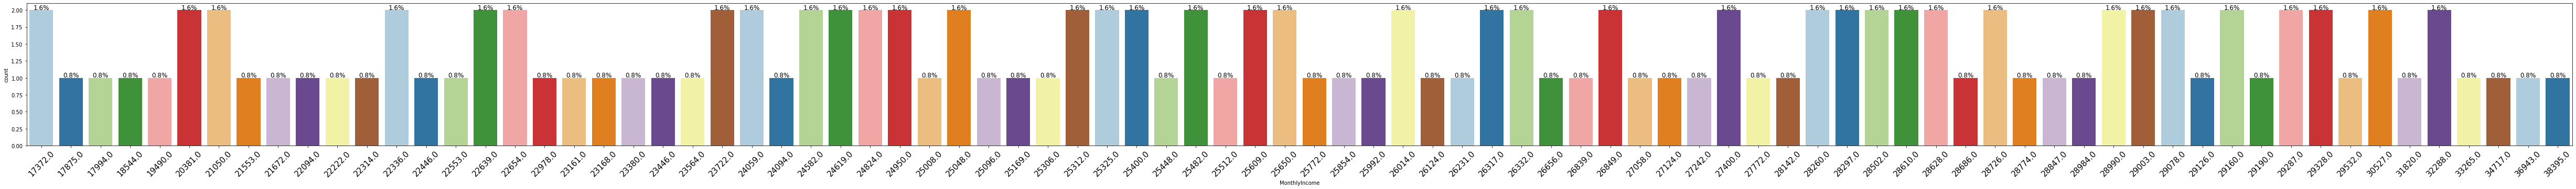

In [ ]:
for i in columns:
  labeled_barplot(df_standard, i, perc=True)
  plt.show()

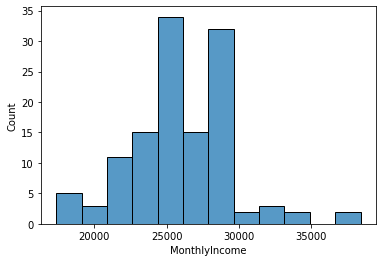

In [ ]:
sns.histplot(data=df_standard, x='MonthlyIncome');

**Standard Package Highlights**

124 Customers have chosen this package. Most of these are aged between 29 and 38 and have self inquired. This package is not preferred by Free Lancers but bought by Divorced, Unmarried, Married and Single. Most of these customers do not have passport. All of these customers are Senior Managers and most of their monthly income range between 20000 to 30000.

Let us now check the **Bivariate Analysis**:

In [ ]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation = 45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

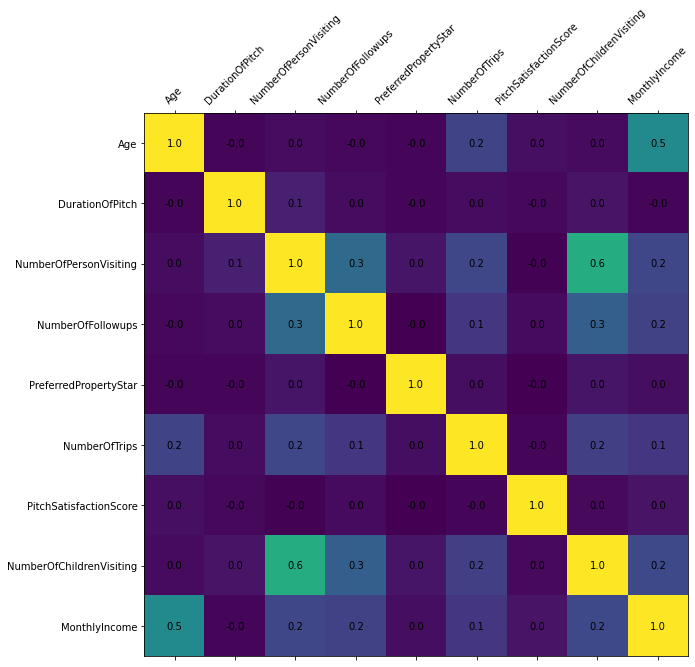

In [ ]:
plot_corr(df)

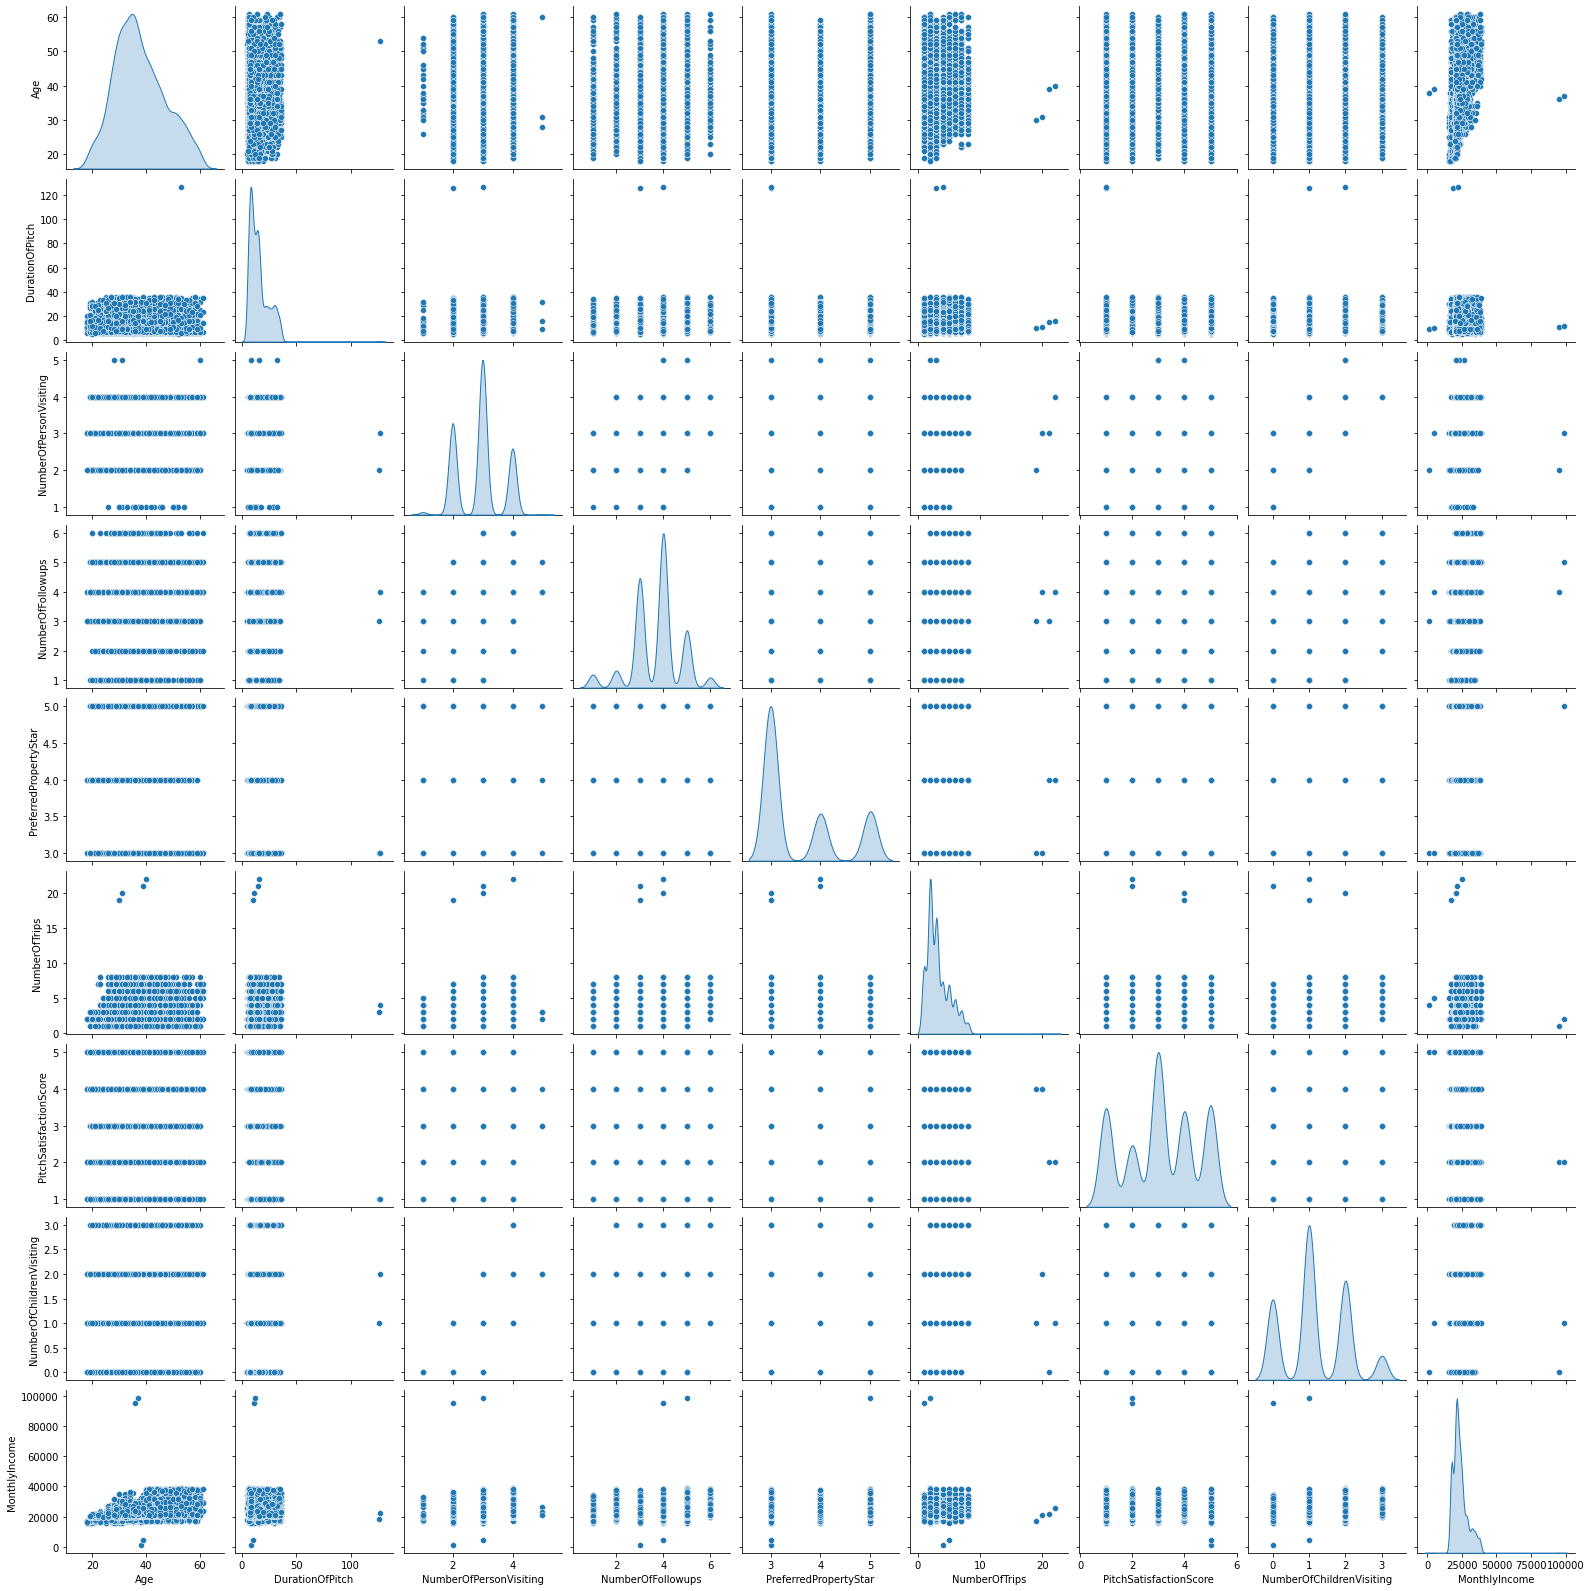

In [ ]:
sns.pairplot(df,diag_kind='kde');

**Relationship between Variables**

* Most of the variable have very weak correlation between each other, except for
  * **Monthly Income** and **Age** - with a positive correlation of 0.5
  * **Number of Children Visiting** and **Number of Person visiting** with a positive correlation of 0.6

Other than these correlations all others have weak correlations.

**Key Highlights from Exploratory Data Analysis:**

* Most people around the age 30 have purchased the Package.
* More people who Self inquired have purchased the package. But, if ratio is to be taken more or less both the types have same conversion - Self inquiry - 607/3444 = ~17.62% of Self inquiry have purchased the package. Company Invited - 310/1419 = ~21.87% of Company Invited have purchased the package.
* Tier 3 people have most purchase.
* People whose occupation is Large Business have mostly purchased the package.
* More Male have purchased the package - 578 out of 2916 - roughly 19.82% conversion.
* One interesting feature is that from the dataset when the Number of people visitng along with the customer is 1 and 5 - those customers have not purchased the package.
* Although most people who preferred 3 stars have purchased the plan by number, if we take the percentage conversion into account, people who preferred 5 stars have predominantly purchased the package.
* Mostly Single people have purchased the package.
* 2 interesting points:
  * When Number of Trips = 19 & 20 (only 1 people in each category), both have purchased the package.
  * When Number of Trips = 21 & 22 (only 1 people in each category), both did not purchase the package.
* People who had passport have purchased the package for most part.
* Excutives has the hightest number of purchases. 552 out of 1842 - 29.97% conversion.
* The Basic package has been purchased by most people - 552 out of 1842 - roughly 29.85%
* When the duration of Pitch is the least ( =6) and whent the duration is pitch is very high (in the range of 120s), the customers have not purchased a package.
* **Basic Package Highlights**

  Most of the customers who have selected the Basic Package are aged between 25 to 20, mostly self inquired, mostly live in Tier 1 city. Although the duration of pitch is widely spread, majority is between 8 to 16 mins, mostly have small business as occupation, most of these customers are Male. In most cases, the number of persons visiting with the customer is 3, the number of followups with these customer is mostly 4, about 50% of these customers prefer 3 star hotel, majority of these customers are single. The number of trips is spread across, but mostly these customers take 2 to 3 trips in a year, most of these customers have passport, and owns car. All of these customers are Executive. Majority of these customers have salary below 25000.

* **Deluxe Package Highlights**

  Most of the customers who have selected the Basic Package are aged between 31 to 39, mostly self inquired, mostly live in Tier 3 city. Although the duration of pitch is widely spread, majority is between 6 to 20 mins, mostly have small business as occupation, most of these customers are Male. In most cases, the number of persons visiting with the customer is 3, the number of followups with these customer is mostly 4, about 50% of these customers prefer 3 star hotel, majority of these customers are Married but Unmarried also prefer this package. The number of trips is spread across, but mostly these customers take 2 trips in a year. Both types of customers with passport and without passport prefer this package and mostly owns car. Surprisingly, all of these customers are Managers. Majority of these customers have salary between 20000 to 25000.

* **King Package Highlights**

  Only 20 customers have purchased this package. Most of these customers are aged between 41 and 59. All of these customers have self inquired. Majority Small business, mostly of these customers are Female. This Package is selected by Single, Married, and Divorced but not unmarried. Most of these customers own car and are VPs. The monthly income of these customers are majorly between 34000 and 39000.

* **Super Deluxe Package Highlights**

  There are only 20 customers who have purchased this package. Majority of these customers are aged between 39 and 43, most of these customers are company invited. Most of these customers live in Tier 3 cities. Most of these customers are Salaried and Male. This Package is not preferred by Divorced people. This package is fairly common among people who has passport and those who doesnot have a passport. All of these customers are AVPs and own a car. The monthly income of these customers range between 21000 to 37500.

* **Standard Package Highlights**

  124 Customers have chosen this package. Most of these are aged between 29 and 38 and have self inquired. This package is not preferred by Free Lancers but bought by Divorced, Unmarried, Married and Single. Most of these customers do not have passport. All of these customers are Senior Managers and most of their monthly income range between 20000 to 30000.

## Missing Value Treatment:

In [ ]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

8 variables are to be treated for missing values. The approach here is to treat the missing values in Categorical variables with Mode. For Numerical variables with outliers, let us treat them with Median and for numerical variables without outliers let us treat them with Mean.

When we Impute based on other variables for more granularity, we will try to take into account of variables that could be relevant and the variables that did not have missing values in the very first place.

For TypeofContact we will fill the NAs with Self Enquiry as they are the most occuring

In [ ]:
df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry')

Let us impute the ProductPithced Based on Gender:

In [ ]:
df['NumberOfFollowups']=df.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

Since PreferredPropertyStar could be based upon Designation, we will impute based on Designation

In [ ]:
df['PreferredPropertyStar']=df.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

For DurationofPitch, it may depend upon the product that is pitched. So, let us impute based on the product pitched.

In [ ]:
df["DurationOfPitch"] = df.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(lambda x: x.fillna(x.median()))

Let us Impute the NumberofTrips based on Marital Status

In [ ]:
df["NumberOfTrips"] = df.groupby(["MaritalStatus"])["NumberOfTrips"].apply(lambda x: x.fillna(x.median()))

In [ ]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
df[df['NumberOfChildrenVisiting'].isnull()].sample(15)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1660,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Married,1.0,0,1,1,NaN,VP,34999.0
4819,1,30.0,Self Enquiry,1,14.0,Large Business,Female,3,4.0,Basic,3.0,Married,5.0,1,4,1,NaN,Executive,34802.0
4403,0,44.0,Self Enquiry,1,13.0,Salaried,Male,3,5.0,Super Deluxe,3.0,Married,6.0,1,3,1,NaN,AVP,35305.0
2388,1,51.0,Company Invited,1,34.0,Salaried,Male,3,4.0,Deluxe,5.0,Single,4.0,0,3,0,NaN,Manager,34847.0
918,0,51.0,Company Invited,3,15.0,Salaried,Male,2,3.0,King,4.0,Married,5.0,1,4,1,NaN,VP,34847.0
2889,0,56.0,Self Enquiry,3,25.0,Salaried,Female,3,4.0,Super Deluxe,4.0,Single,5.0,0,2,0,NaN,AVP,35513.0
2426,1,56.0,Self Enquiry,3,22.0,Salaried,Female,3,3.0,Standard,5.0,Single,3.0,1,5,1,NaN,Senior Manager,34717.0
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,3.0,Married,2.0,0,4,1,NaN,VP,34973.0
3522,0,45.0,Self Enquiry,1,35.0,Salaried,Male,3,4.0,Super Deluxe,5.0,Divorced,5.0,0,1,1,NaN,AVP,35006.0
2792,0,43.0,Self Enquiry,1,30.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Single,4.0,0,3,0,NaN,AVP,34670.0


Taking the look at the age and position of these customers, we can assume that their children would have grown up and might not accompy thr customer. So let us fill these values with 0

In [ ]:
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

For Age, since it has outliers, let us impute with median. But we will impute based on Designation, NumberofTrips, and MaritalStatus for more granularity

In [ ]:
df["Age"] = df.groupby(["Designation", "NumberOfTrips","MaritalStatus"])["Age"].apply(lambda x: x.fillna(x.median()))

Similarly, Since Monthly Income has outliers, we will treat them with Median and Impute based on Occupation, Gender, and Designation for more granularity.

In [ ]:
df["MonthlyIncome"]=df.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

In [ ]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

No we have treated all our missing values.

## Outliers Treatment

During our Univariate Analysis, we saw that the variables MonthlyIncome, DurationOfPitch and NumberOfTrips had outliers from the box plot

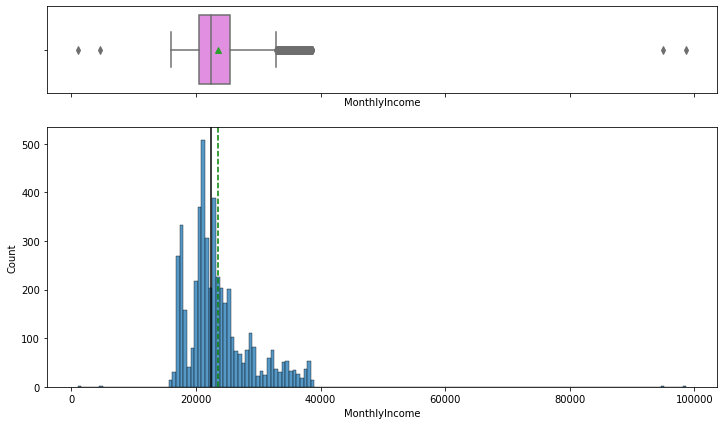

In [ ]:
histogram_boxplot(df,"MonthlyIncome")

The Ones on the far right and the ones on the far left seem to be very extreme. Let us examine these datapoints

In [ ]:
df[(df['MonthlyIncome']<10000) | (df['MonthlyIncome'] > 50000)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


For the ones that are below 10000, the designation is Manager but the monthly income is very less. Hence, this should be some kind of data entry mistake. So let us remove these datapoints.

For the other two datapoints, allthough it does not look like data entry mistake based on the age, designation, we will still remove those data points as they will bias the model.

In [ ]:
df.drop(index=df[(df.MonthlyIncome>50000) | (df.MonthlyIncome<10000)].index,inplace=True)

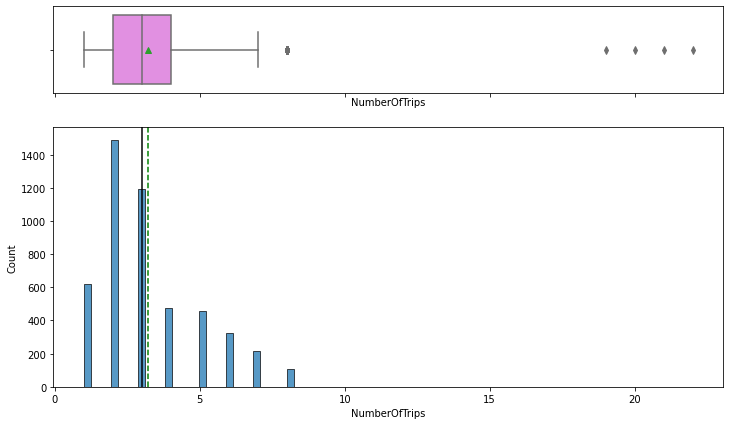

In [ ]:
histogram_boxplot(df,"NumberOfTrips")

Let us examine the ones that are beyond 15

In [ ]:
df[df['NumberOfTrips'] > 15]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


We will remove the above datapoints as they will bias the data. Also, the above datapoints look to be a but skeptical, based on the monthly income given their age and position.

In [ ]:
df.drop(index=df[df.NumberOfTrips>15].index,inplace=True)

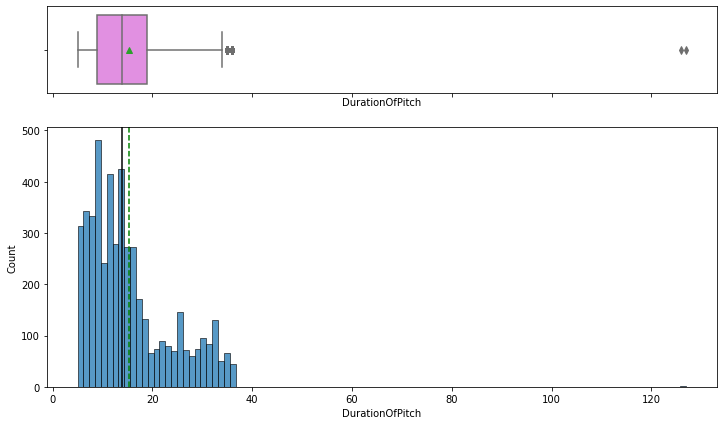

In [ ]:
histogram_boxplot(df,"DurationOfPitch")

Let us examine the ones that are beyond 100

In [ ]:
df[df['DurationOfPitch'] > 100]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,31.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


Let us remove these datapoints, as they are way off from other values and might bias the model.

In [ ]:
df.drop(index=df[df['DurationOfPitch']>100].index,inplace=True)

# Model Building

Before Model Building, let us focus on what performance parameter we should focus on - so that we can try to optimize the model based on that performance parameter.

In our case,

**False Positives**: We predict a customer would buy a package, but in reality he/she does not buy.

**False Negatives**: We predict a customer would not buy a package, but in reality he/she buy a package.

Evey False Negative is a lost opportunity. We want to keep our False Negatives low, therefore our Recall should be high. Thus, our model should be built in such a way that the recall is high.

Before splitting our data to create X and Y variables - Our Data set contains Customer Interaction data - **PitchSatisfactionScore**, **ProductPitched**, **NumberOfFollowups**, **DurationOfPitch**.

Since these variables would not be available at the time of prediction, we will remove these variables as well for our X along with ProdTaken

In [ ]:
X = df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

## Bagging Classifier

**Bagging Classifier - Base estimator - Decision Tree**

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

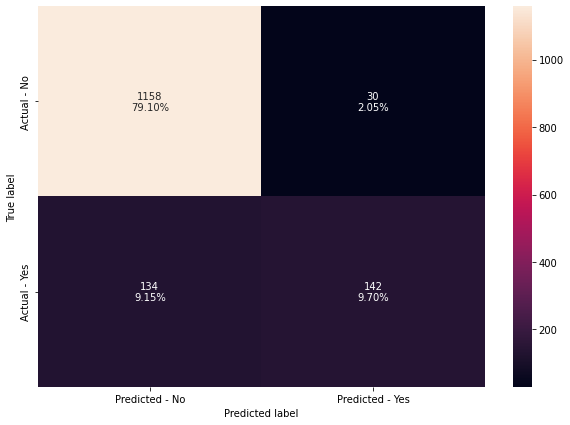

In [ ]:
make_confusion_matrix(bagging_estimator,y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.989162272993556
Accuracy on test set :  0.8879781420765027
Recall on training set :  0.9470404984423676
Recall on test set :  0.5144927536231884
Precision on training set :  0.9950900163666121
Precision on test set :  0.8255813953488372


We have our Base Model without tuning the hyperparameters. All the performance parameters are good on the training set but lacking on the testing set, meaning the current model is overfitting based on training data. Let us see if we could reduce overfitting by tuning the hyperparameters.

**Bagging Classifier - Tuned**

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Based on our input values for our hyperparameters, the best value for max_samples is 0.9, max_features is 0.9 and n_estimators is 50. Let us see the metrics for these values.

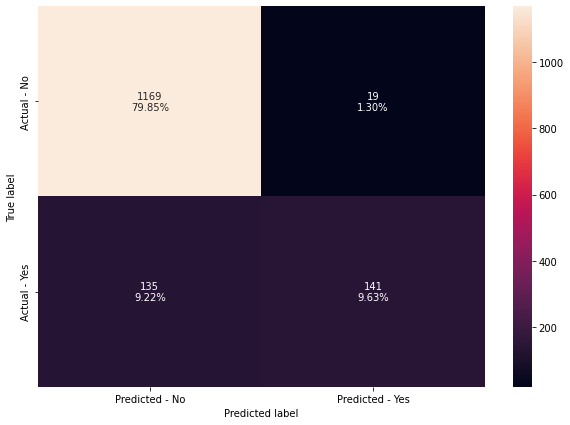

In [ ]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [ ]:
bagging_estimator_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9994141769185706
Accuracy on test set :  0.894808743169399
Recall on training set :  0.9968847352024922
Recall on test set :  0.5108695652173914
Precision on training set :  1.0
Precision on test set :  0.88125


The Recall for test value has further reduced. The model is still overfitting the data. Let us now try logistic regression as our base estimator

**Bagging Classifier - Base Estimator - Logistic Regression**

In [ ]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

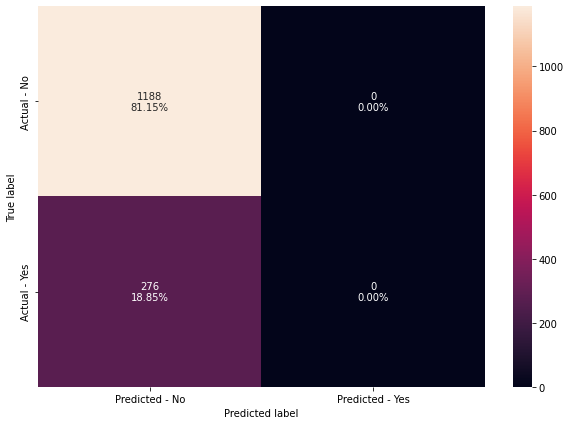

In [ ]:
make_confusion_matrix(bagging_lr,y_test)

In [ ]:
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.81195079086116
Accuracy on test set :  0.8114754098360656
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0


Clearly, this model would not work.

## Random Forest Classifier:

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

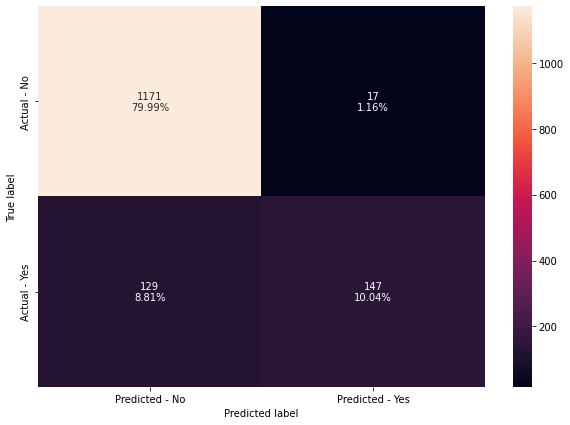

In [ ]:
make_confusion_matrix(rf_estimator,y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9002732240437158
Recall on training set :  1.0
Recall on test set :  0.532608695652174
Precision on training set :  1.0
Precision on test set :  0.8963414634146342


The Model apparently overfits the data, but the recall value we have here is the best yet. Let us see if we could reduce the overfitting by tuning the hyperparameters.

**Random Forest Classifier - Tuned**

In [ ]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 8),
    "max_features": np.arange(0.2, 0.5, 0.1),
    "max_samples": np.arange(0.3, 0.5, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.4000000000000001, max_samples=0.4,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

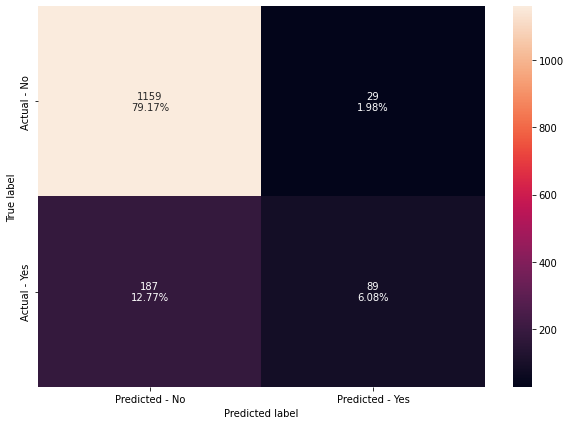

In [ ]:
make_confusion_matrix(rf_estimator_tuned,y_test)

In [ ]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.8737551259519625
Accuracy on test set :  0.8524590163934426
Recall on training set :  0.3909657320872274
Recall on test set :  0.322463768115942
Precision on training set :  0.8625429553264605
Precision on test set :  0.7542372881355932


With the Tuned model, we have addressed the overfitting issue, but we have lost our recall.

**Random Forest Classifier with Class Weights**

In [ ]:
# Choose the type of classifier.
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.6, 0.1),
    "max_samples": np.arange(0.3, 0.5, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.5000000000000001, max_samples=0.4,
                       min_samples_leaf=9, n_estimators=250, random_state=1)

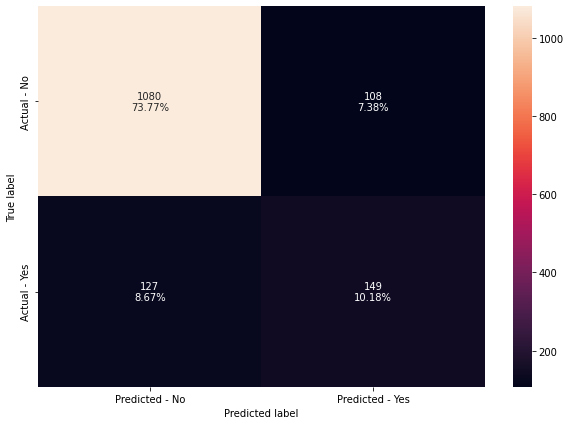

In [ ]:
make_confusion_matrix(rf_estimator_weighted,y_test)

In [ ]:
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.8608670181605155
Accuracy on test set :  0.8394808743169399
Recall on training set :  0.5669781931464174
Recall on test set :  0.5398550724637681
Precision on training set :  0.6488413547237076
Precision on test set :  0.5797665369649806


This Model has addressed the Overfitting issue, but the recall is still around 50% for testing data. Let us see the variables contributing:

**Feature Importance**

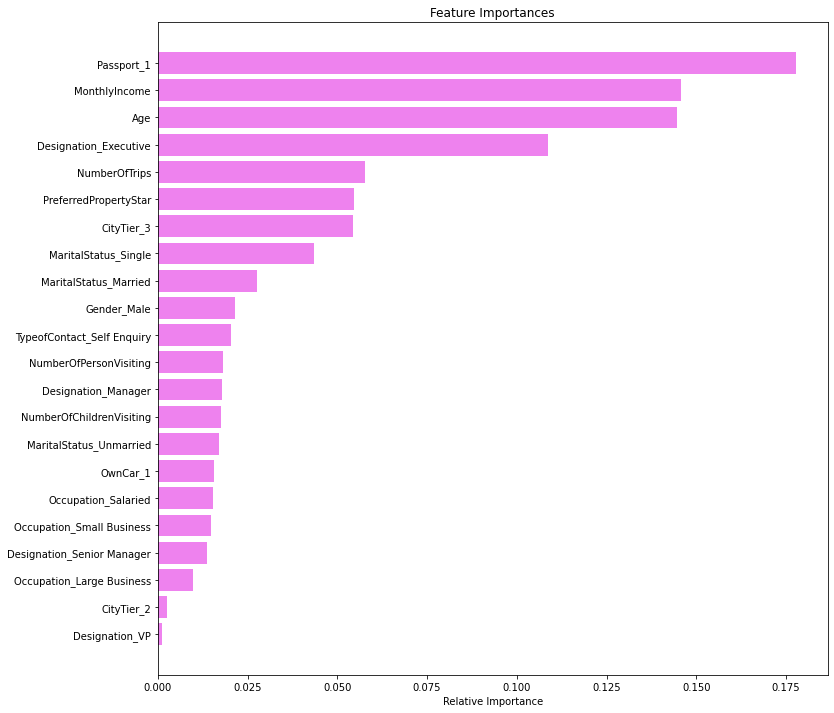

In [ ]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport, MonthlyIncome, Age,Designation, are the top 4 features that explains the dataset.

**Comparison of All Bagging and Random Forest Models**

In [ ]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.89,0.95,0.51,1.00,0.83
1,Tuned Bagging Classifier,1.00,0.89,1.00,0.51,1.00,0.88
2,Bagging classifier with base_estimator=LR,0.81,0.81,0.00,0.00,0.00,0.00
3,Random Forest with deafult parameters,1.00,0.90,1.00,0.53,1.00,0.90
4,Tuned Random Forest Classifier,0.87,0.85,0.39,0.32,0.86,0.75
5,Random Forest with class_weights,0.86,0.84,0.57,0.54,0.65,0.58


## Boosting

**AdaBoost Classifier**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

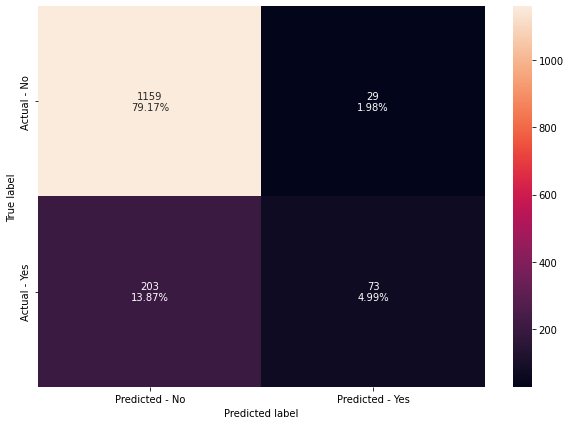

In [ ]:
make_confusion_matrix(abc,y_test)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8453427065026362
Accuracy on test set :  0.8415300546448088
Recall on training set :  0.29595015576323985
Recall on test set :  0.2644927536231884
Precision on training set :  0.7142857142857143
Precision on test set :  0.7156862745098039


The Model here does not have overfitting issue, but the recall value is not good. Let us see if could get good results with Tuning

**AdaBoost Tuned**

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1)],
    "n_estimators": np.arange(10,100,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.9, n_estimators=80, random_state=1)

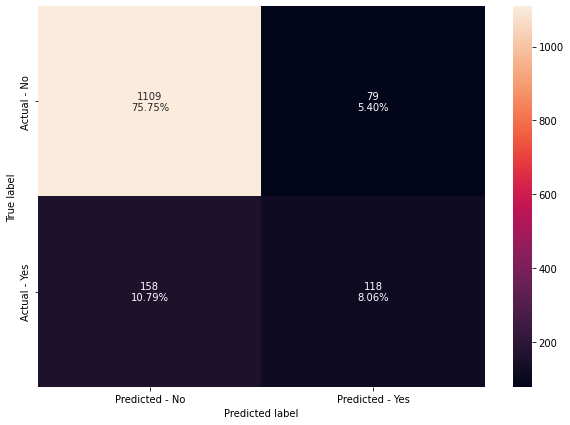

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

In [ ]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.8927943760984183
Accuracy on test set :  0.8381147540983607
Recall on training set :  0.5716510903426791
Recall on test set :  0.427536231884058
Precision on training set :  0.8013100436681223
Precision on test set :  0.5989847715736041


The Recall has increased to a small extent

**Gradient Boosting**

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

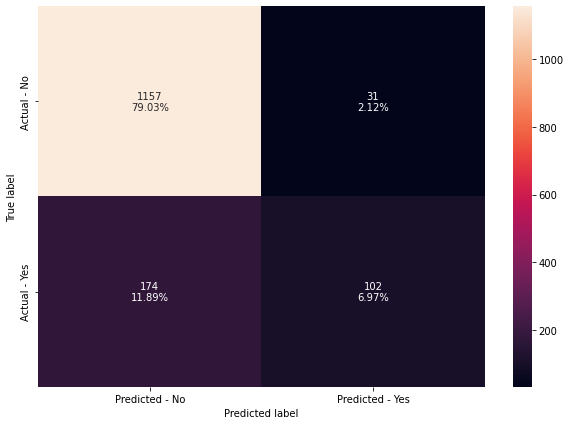

In [ ]:
make_confusion_matrix(gbc,y_test)

In [ ]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8781487990626831
Accuracy on test set :  0.8599726775956285
Recall on training set :  0.42834890965732086
Recall on test set :  0.3695652173913043
Precision on training set :  0.8487654320987654
Precision on test set :  0.7669172932330827


The Recall could still be improved.

**Gradient Boost - Tuned**

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

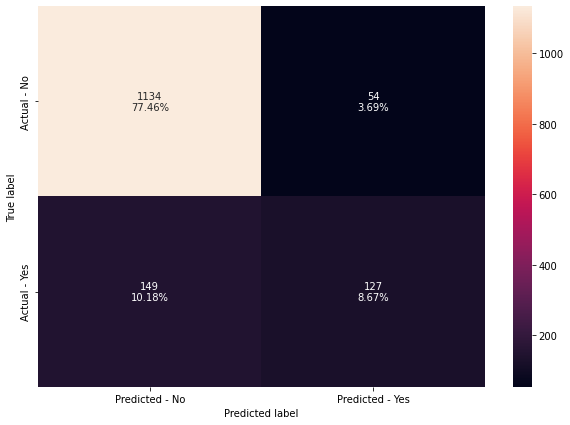

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

In [ ]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9103690685413005
Accuracy on test set :  0.8613387978142076
Recall on training set :  0.5825545171339563
Recall on test set :  0.4601449275362319
Precision on training set :  0.9077669902912622
Precision on test set :  0.7016574585635359


**XGBoost**

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

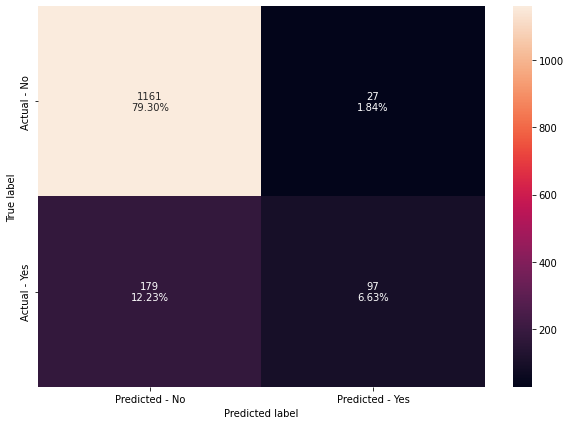

In [ ]:
make_confusion_matrix(xgb,y_test)

In [ ]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.8719976567076743
Accuracy on test set :  0.8592896174863388
Recall on training set :  0.397196261682243
Recall on test set :  0.35144927536231885
Precision on training set :  0.8360655737704918
Precision on test set :  0.782258064516129


This Model has similar Recall as Gradient Boosting

In [ ]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [ ]:
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15],
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]

             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [ ]:
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8790275336848272
Accuracy on test set :  0.8633879781420765
Recall on training set :  0.43302180685358255
Recall on test set :  0.37318840579710144
Precision on training set :  0.8501529051987767
Precision on test set :  0.7923076923076923


In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned',
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.84,0.30,0.26,0.71,0.72
1,AdaBoost Tuned,0.89,0.84,0.57,0.43,0.80,0.60
2,Gradient Boosting with default parameters,0.88,0.86,0.43,0.37,0.85,0.77
3,Gradient Boosting with init=AdaBoost,0.88,0.86,0.43,0.37,0.85,0.79
4,Gradient Boosting Tuned,0.91,0.86,0.58,0.46,0.91,0.70
5,XGBoost with default parameters,0.87,0.86,0.40,0.35,0.84,0.78


**Comparing All Models**

In [ ]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted,abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights','AdaBoost with default paramters','AdaBoost Tuned',
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.89,0.95,0.51,1.00,0.83
1,Tuned Bagging Classifier,1.00,0.89,1.00,0.51,1.00,0.88
2,Bagging classifier with base_estimator=LR,0.81,0.81,0.00,0.00,0.00,0.00
3,Random Forest with deafult parameters,1.00,0.90,1.00,0.53,1.00,0.90
4,Tuned Random Forest Classifier,0.87,0.85,0.39,0.32,0.86,0.75
5,Random Forest with class_weights,0.86,0.84,0.57,0.54,0.65,0.58
6,AdaBoost with default paramters,0.85,0.84,0.30,0.26,0.71,0.72
7,AdaBoost Tuned,0.89,0.84,0.57,0.43,0.80,0.60
8,Gradient Boosting with default parameters,0.88,0.86,0.43,0.37,0.85,0.77
9,Gradient Boosting with init=AdaBoost,0.88,0.86,0.43,0.37,0.85,0.79


The Best Model we have achieved so far is the Random Forest model with Class Weights. This model has less overfiting issue and the best recall among other models.

Lets take a look at the feature importance of that model again to develop business insights

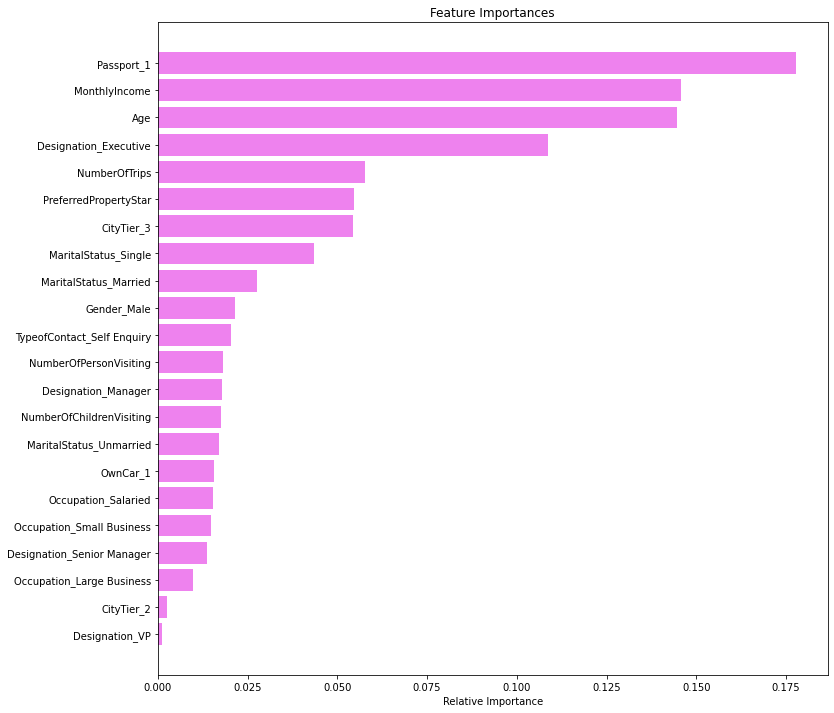

In [ ]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Business Insights**

* Desgination, Passport,TierCity,Martialstatus,occupation are the key features that the company should focus to attract customers to make them buy packages.

* People whose occupation is Executive should be targeted more.

* Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.

* Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

* Based on EDA ,Factors from customer interaction data which can help in increasing the chances of the customer buying the travel package are:
  * Having a higher duration of pitch by salesman to the customer.
  * Getting a PitchSatisfactionScore of 3 or 5.
  * As the chance of buying a package increased with follow ups from EDA, we should have multiple followups.

* Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.

* Mostly Single customers are accpeting a package.